# Bike Sharing Case Study
___
___

**Problem Statement:**

Build a multiple linear regression model for the prediction of demand for shared bikes.

## Load Libraries
___

In [180]:
import pandas as pd                                                         # For data manipulation and analysis (loading, cleaning, transforming data)
import numpy as np                                                          # For numerical computations (arrays, matrices, linear algebra)
import matplotlib.pyplot as plt                                             # For creating visualizations (charts, plots)
import seaborn as sns                                                       # For creating statistical data visualizations (built on top of Matplotlib)
from sklearn.feature_selection import RFE                                   # For feature selection using recursive feature elimination
from sklearn.model_selection import train_test_split                        # For splitting data into training and testing sets
from sklearn.preprocessing import MinMaxScaler                              # For data scaling (normalization)
from sklearn.linear_model import LinearRegression                           # For building linear regression models
from sklearn.metrics import r2_score                                        # For evaluating model performance (R-squared)
import statsmodels.api as sm                                                # For statistical modeling (including linear regression)
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating VIF (multi collinearity detection)

## Load Data
___

In [181]:
data = pd.read_csv('day.csv')                                               # dataset on daily bike demands across the American market 

## Exploratory Data Analysis
___

### Check data sample

In [182]:
data.sample(n=5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
196      197  16-07-2018       3   0     7        0        1           1   
187      188  07-07-2018       3   0     7        0        6           0   
14        15  15-01-2018       1   0     1        0        1           1   
31        32  01-02-2018       1   0     2        0        4           1   
390      391  26-01-2019       1   1     1        0        6           0   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
196           1  28.153347  31.91315  58.5000  13.958914    2418        3505   
187           1  30.750000  34.34355  65.1250  10.666400     754        3838   
14            2   9.566653  12.40560  49.8750  10.583521     222        1026   
31            2   7.879134  11.72650  82.9565   3.565271      47        1313   
390           2  14.008347  17.80250  76.9583   4.917519     244        3831   

      cnt  
196  5923  
187  4592  
14   1248  
31   1360  
390  4075

### Check column type

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Checking shape of data

In [184]:
data.shape

(730, 16)

### Check for missing values

In [185]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Check for Duplicates

In [186]:
data.duplicated().sum()

0

### Get Descriptive Analytics

In [187]:
# Get all Numeric columns
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [188]:
data[numeric_cols].describe()

temp       atemp         hum   windspeed          cnt
count  730.000000  730.000000  730.000000  730.000000   730.000000
mean    20.319259   23.726322   62.765175   12.763620  4508.006849
std      7.506729    8.150308   14.237589    5.195841  1936.011647
min      2.424346    3.953480    0.000000    1.500244    22.000000
25%     13.811885   16.889713   52.000000    9.041650  3169.750000
50%     20.465826   24.368225   62.625000   12.125325  4548.500000
75%     26.880615   30.445775   72.989575   15.625589  5966.000000
max     35.328347   42.044800   97.250000   34.000021  8714.000000

In [189]:
categorical_cols = ['season', 'weekday', 'weathersit', 'mnth']

In [190]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Dropping irrelevant Features

- **instant**: This variable appears to be an index value and not relevant for further analysis.
- **dteday**: The data dictionary indicates this variable contains the date. Since we already have separate columns for 'year' and 'month', the 'dteday' column is redundant.
- **casual and registered**: These columns contain counts of bicycles rented by different customer categories. If the focus is on total rentals and not specific categories, these columns can be excluded.

In [191]:
data.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

### Activities Performed / Inferences
___
1. Loaded the relevant libraries, and then the data to prepare Linear Regression model on.
2. Performed EDA on the dataset.
3. Identified 16 columns and 730 rows in the dataset.
4. There were neither any missing nor duplicate values in the dataset.
5. Didn't identify any substantial outliers using descriptive statistics.
6. Dropped columns: instant, dteday, casual and registered.

## Visualizations
___

### Check for Outliers

#### 1. Numerical Columns

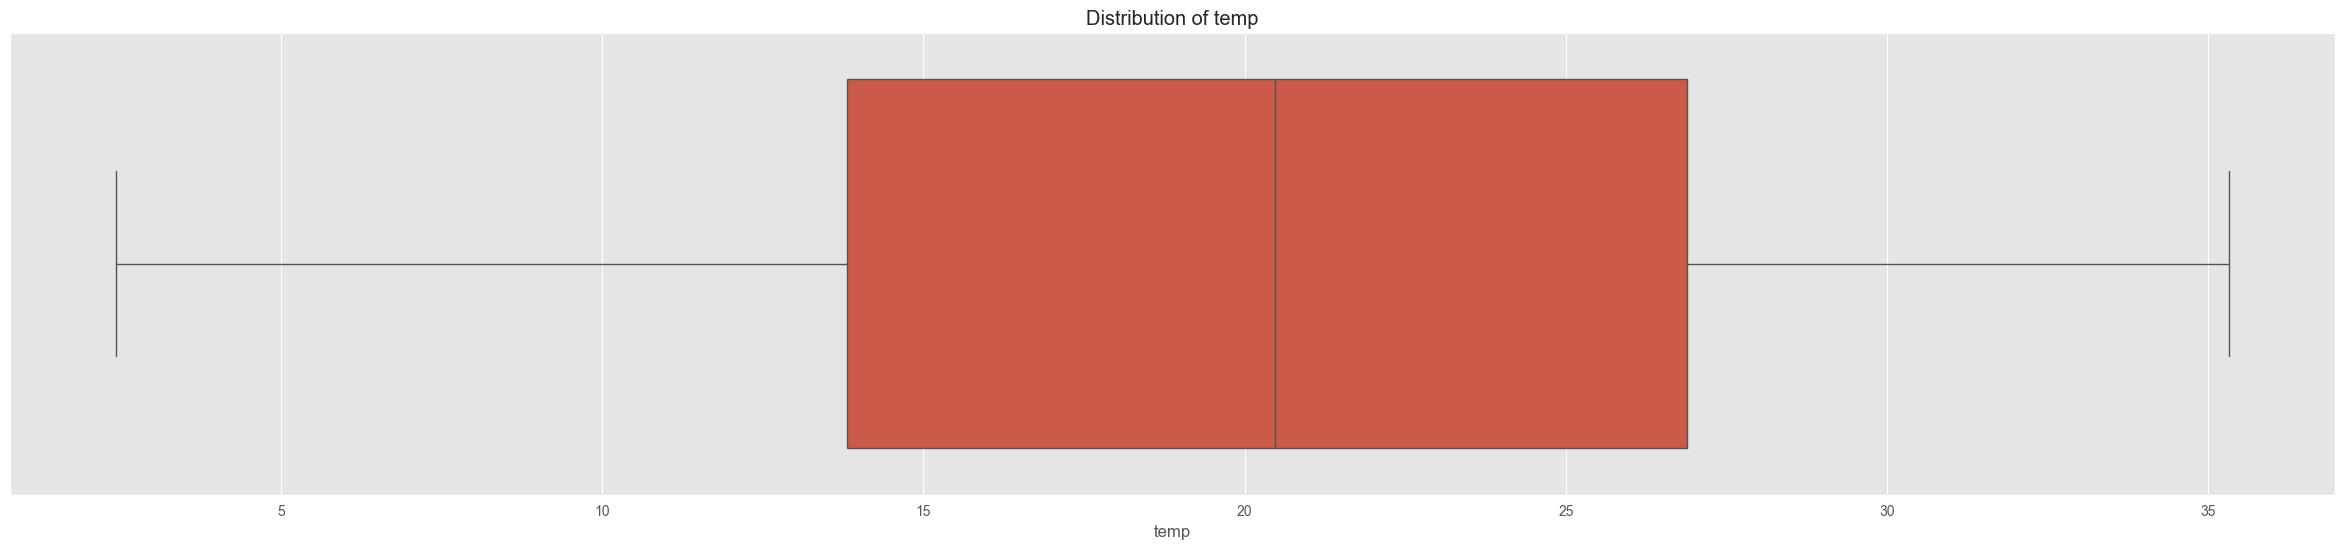

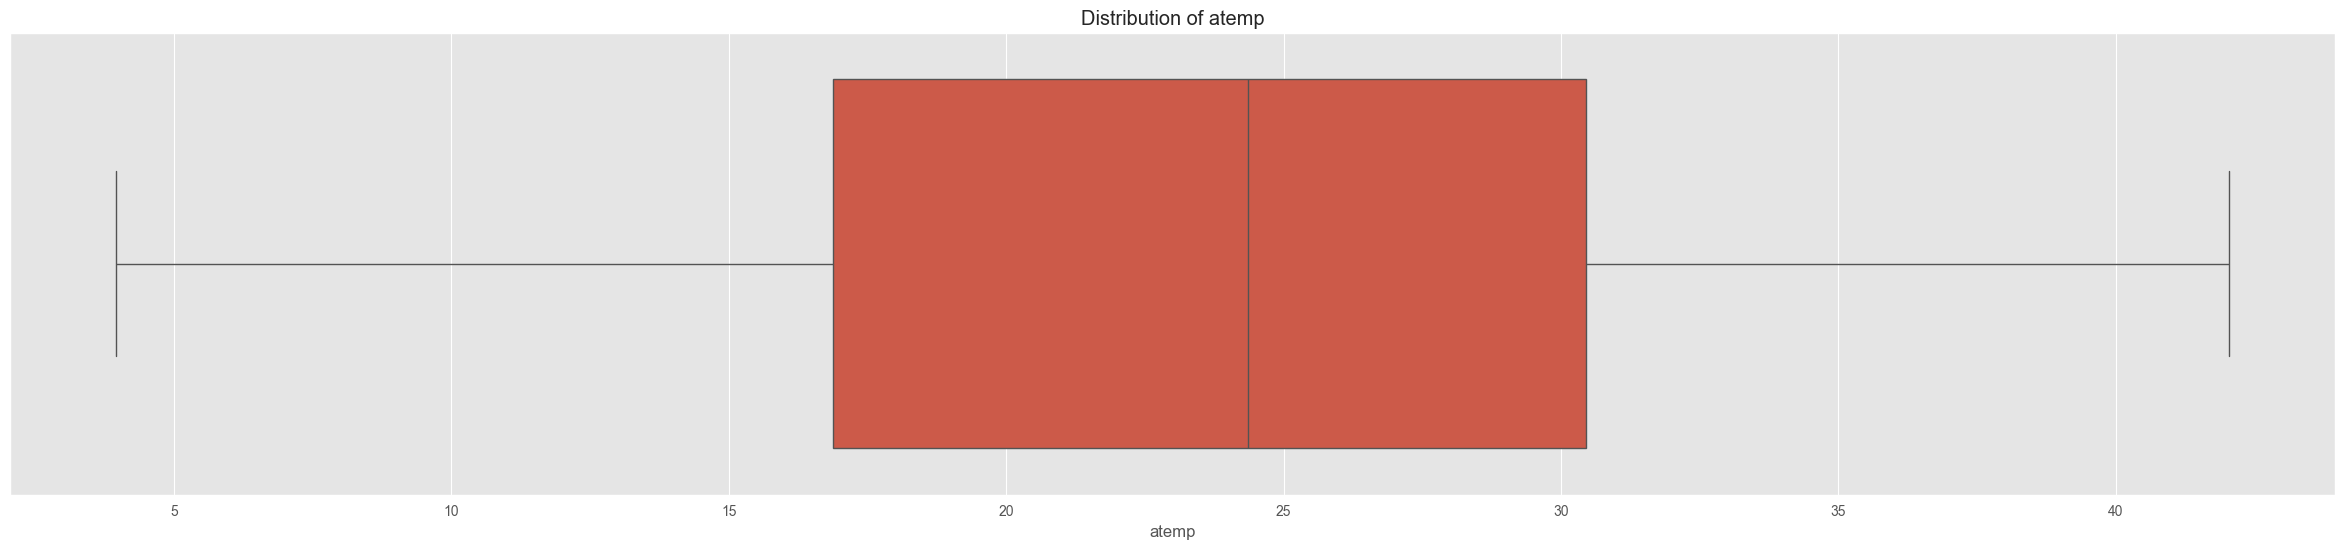

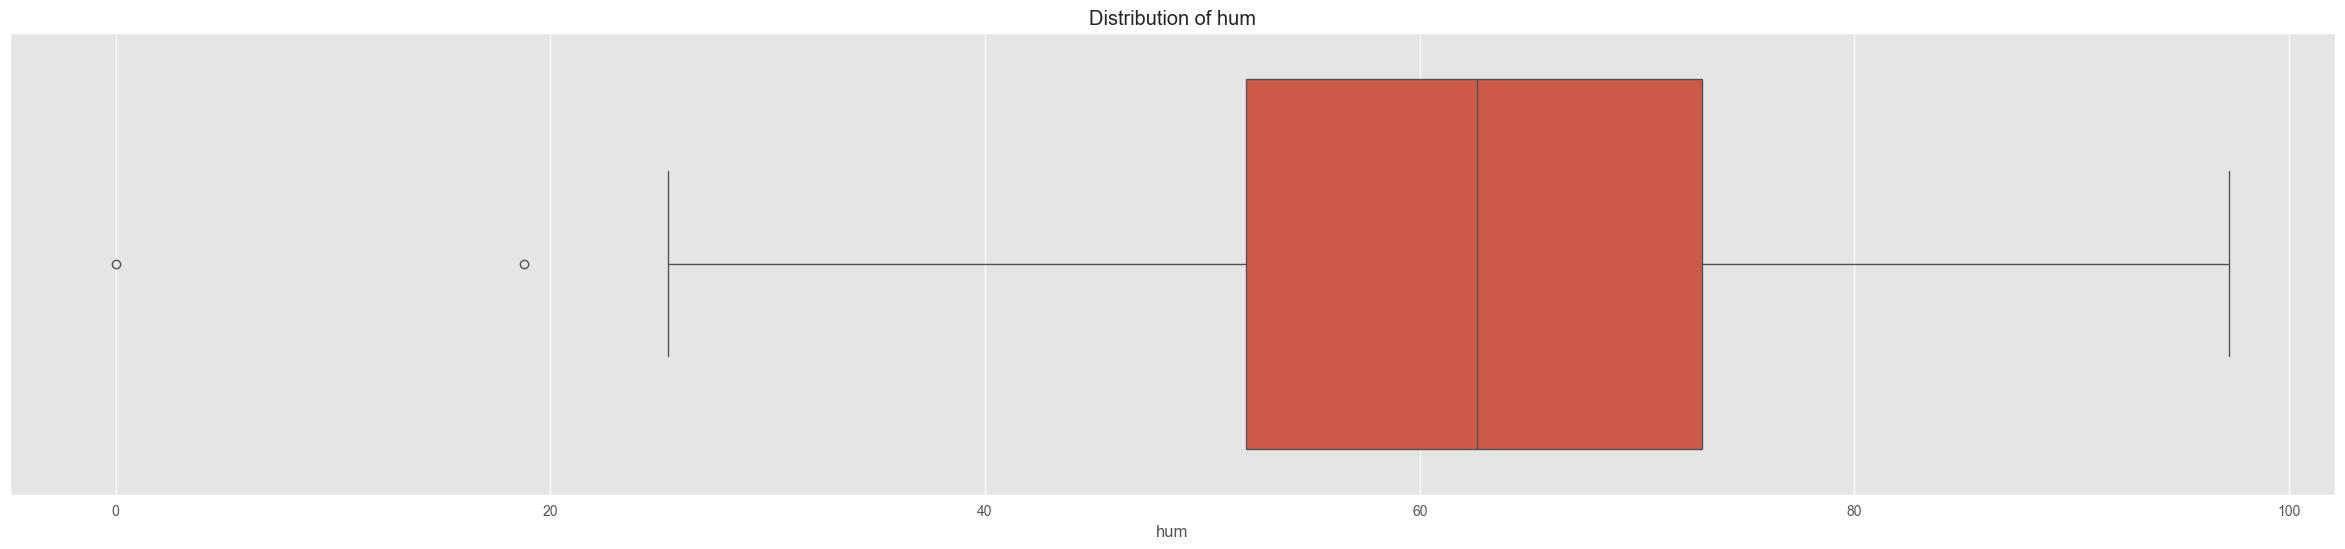

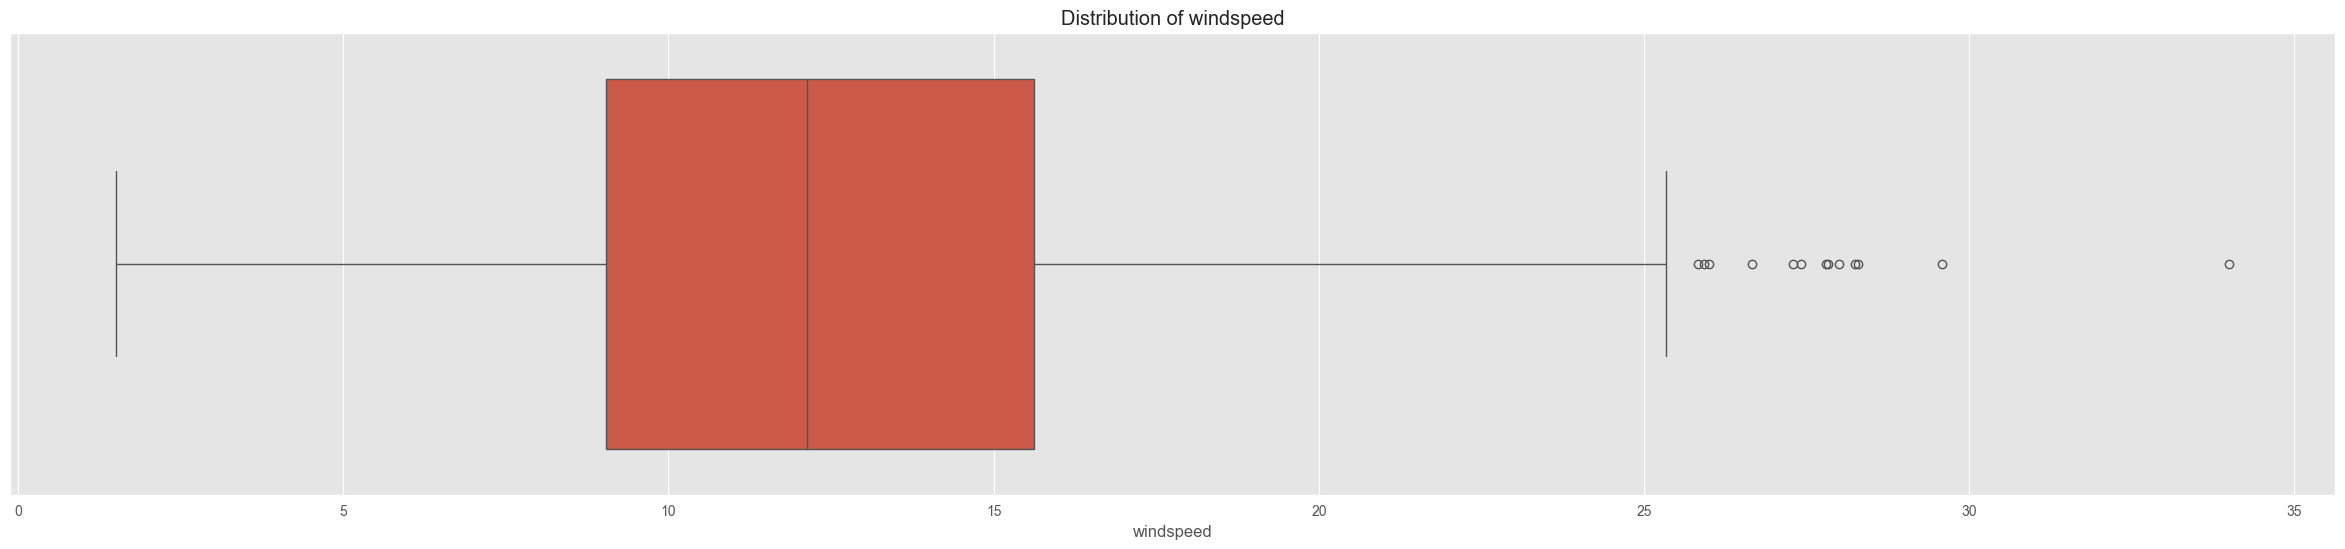

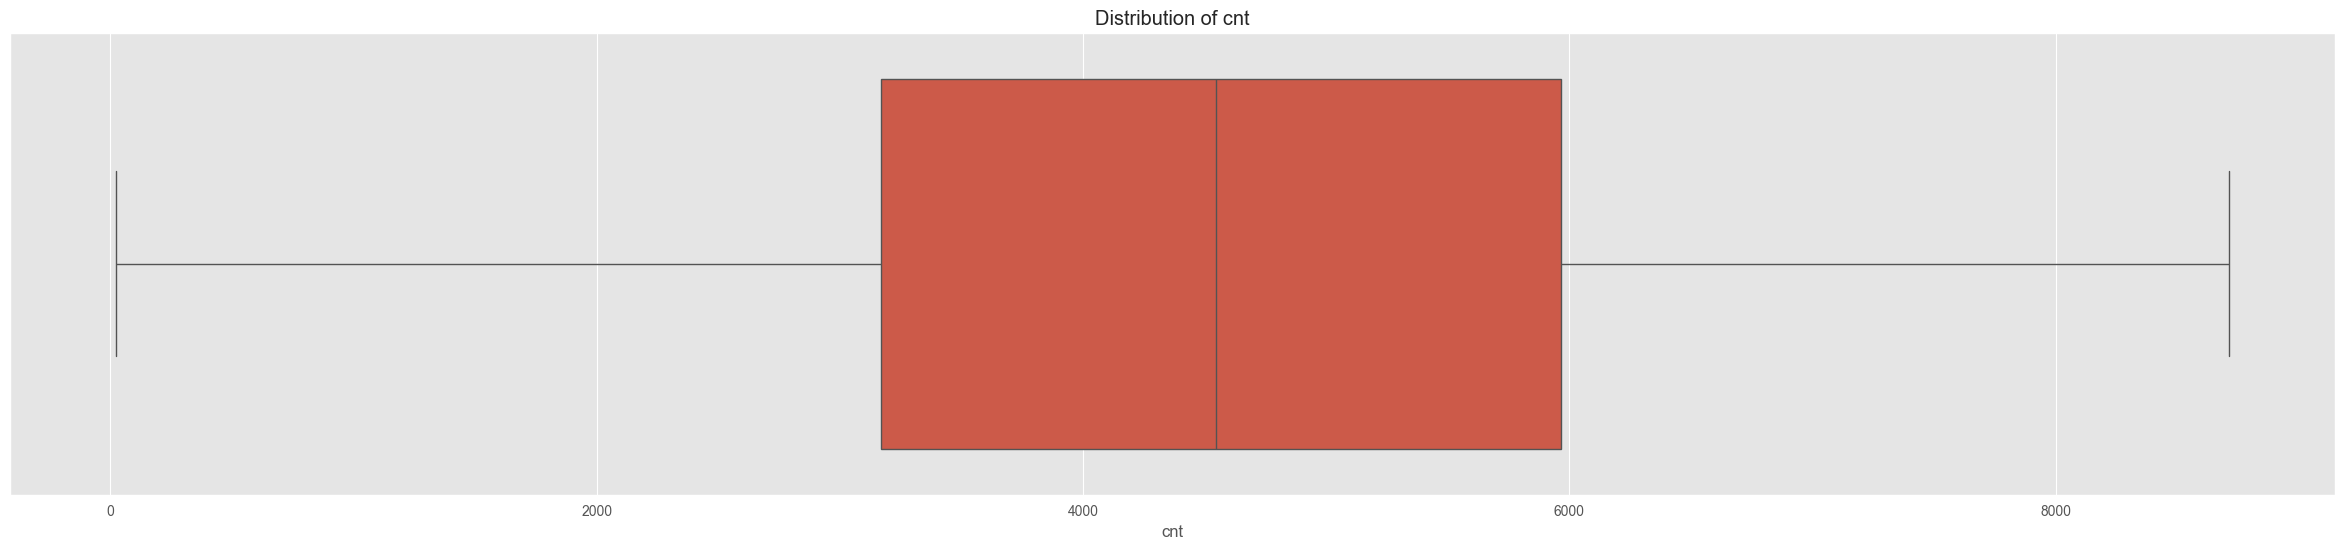

In [192]:
# Prepare Box plot for each numeric columns
for col in numeric_cols:
    plt.style.use('ggplot')
    plt.figure(figsize=(30, 6))
    plt.title('Distribution of ' + col)
    sns.boxplot(data=data[col], orient='h')
plt.show()

#### 2. Categorical Columns

In [193]:
# Columns where the value are of True/False or 0/1 types
binary_columns = ['yr', 'holiday', 'workingday', 'holiday']

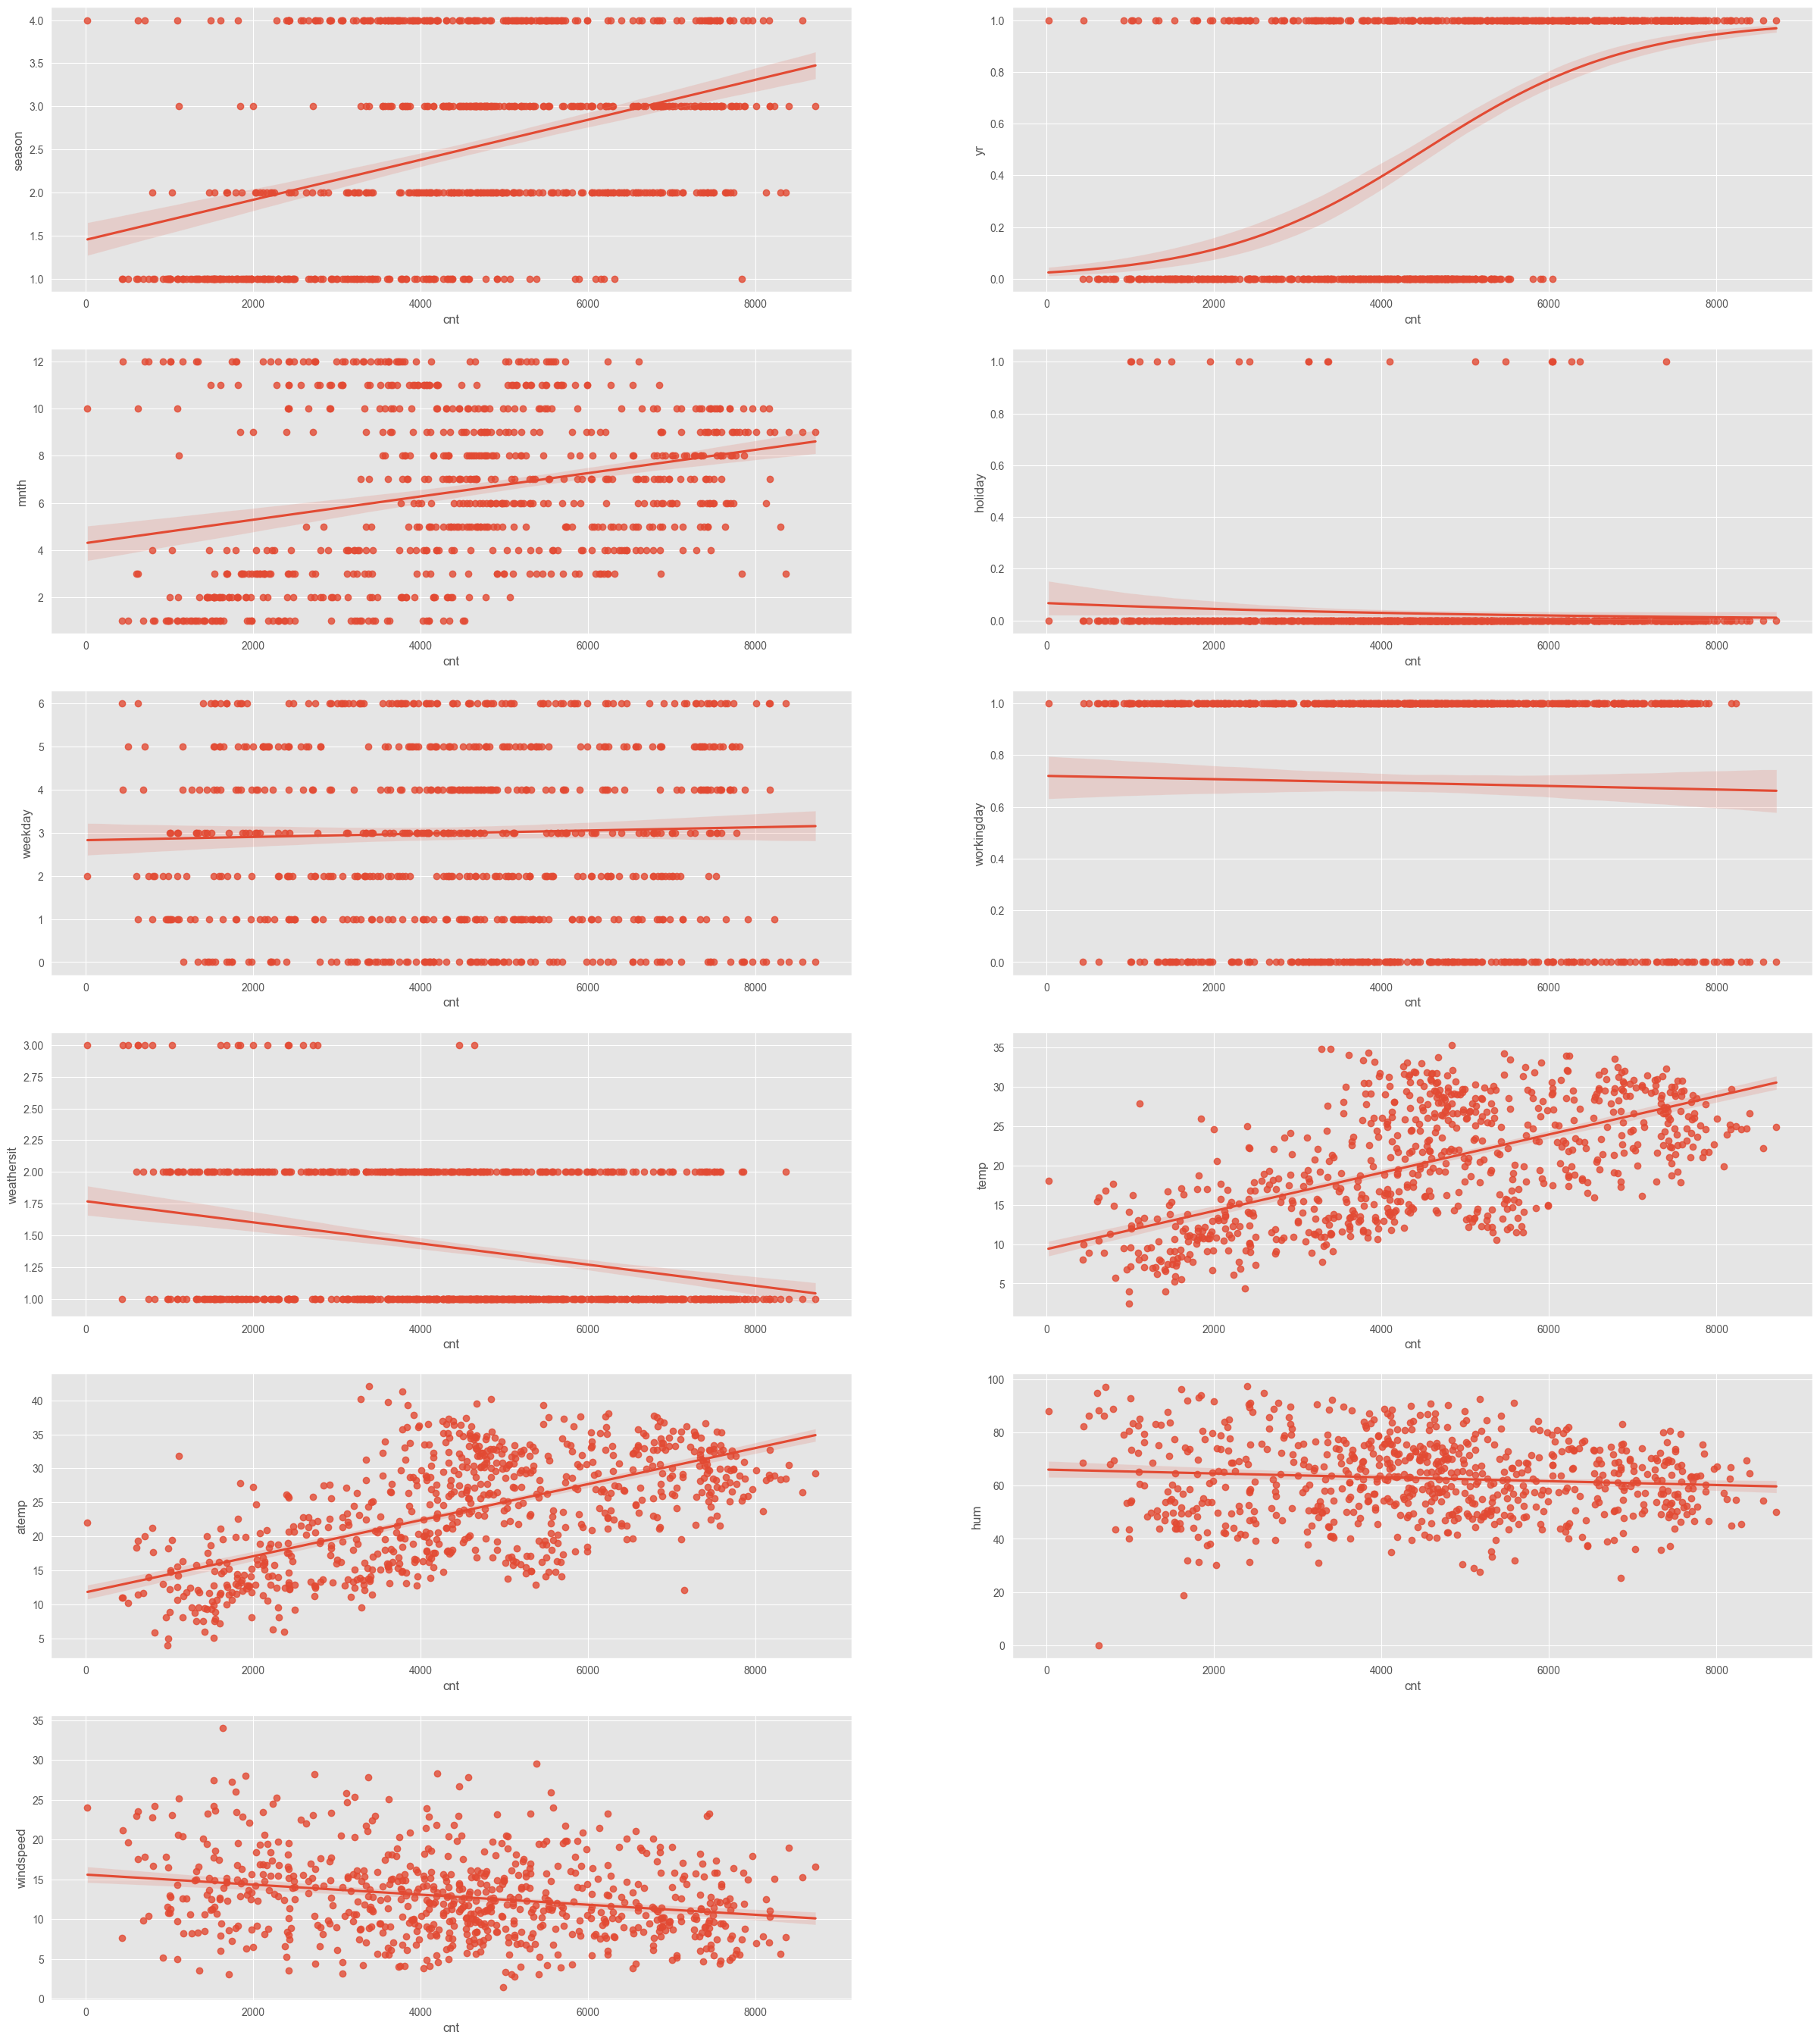

In [194]:
# Plotting Regression Plots to see which variables/features are linear in nature w.r.t. to target variable 'cnt'
j = 0
plt.figure(figsize=(30, 40))
for col in data.drop(columns=['cnt']):
    j += 1
    plt.subplot(7, 2, j)
    sns.regplot(data, x='cnt', y=col, logistic=col in binary_columns)                               # True if column is in binary_column list else False
plt.show()

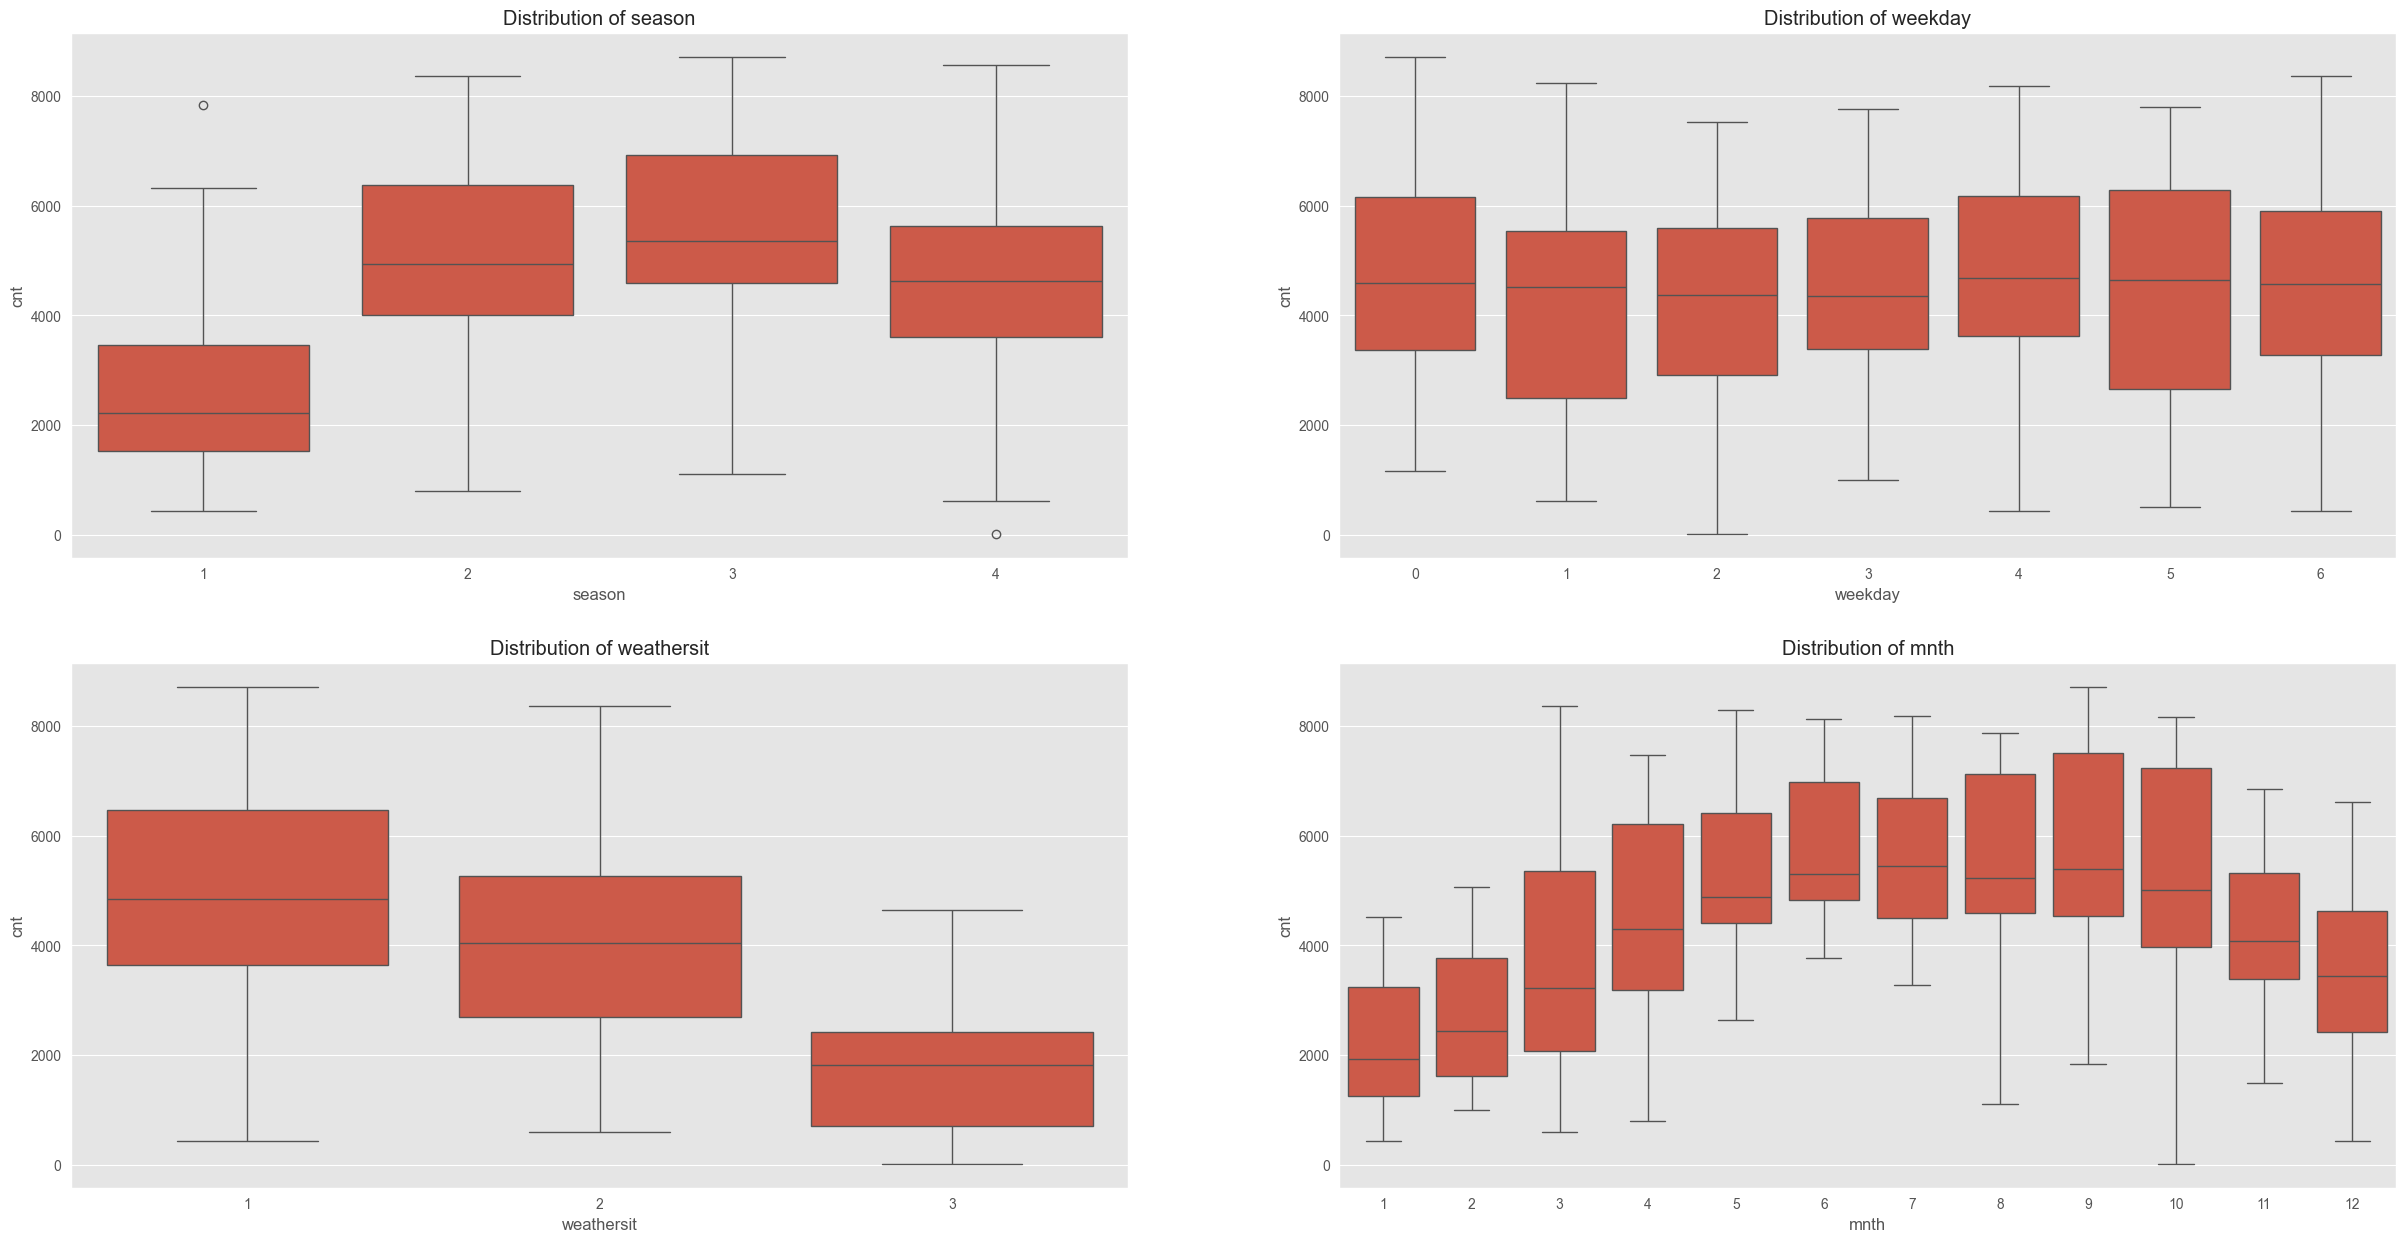

In [195]:
# Prepare Box plot for each categorical columns w.r.t. 'cnt' variable
k = 0
plt.figure(figsize=(30, 15))
for col in categorical_cols:
    k+=1
    plt.style.use('ggplot')
    plt.subplot(2, 2, k)
    plt.title('Distribution of ' + col)
    sns.boxplot(data=data, y='cnt', x=col)
plt.show()

### Users in 2018 and 2019 

In [196]:
# Mapping 0 to 2018 and 1 to 2019
year_mapping = {
    0: 2018,
    1: 2019
}

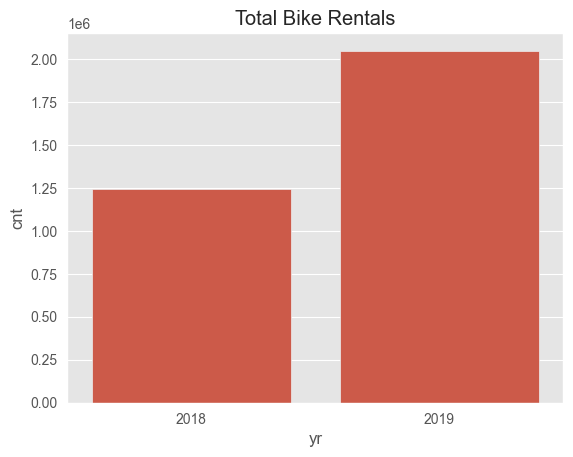

In [197]:
# Plotting Bar chart for Total Bike rentals (Year-wise)
plt.title('Total Bike Rentals')
sns.barplot(x=data['yr'].map(year_mapping), y='cnt', data=data, errorbar=None, estimator=sum)                                       # Using estimator=sum to get the Total sum instead of default count
plt.show()

### Users across months

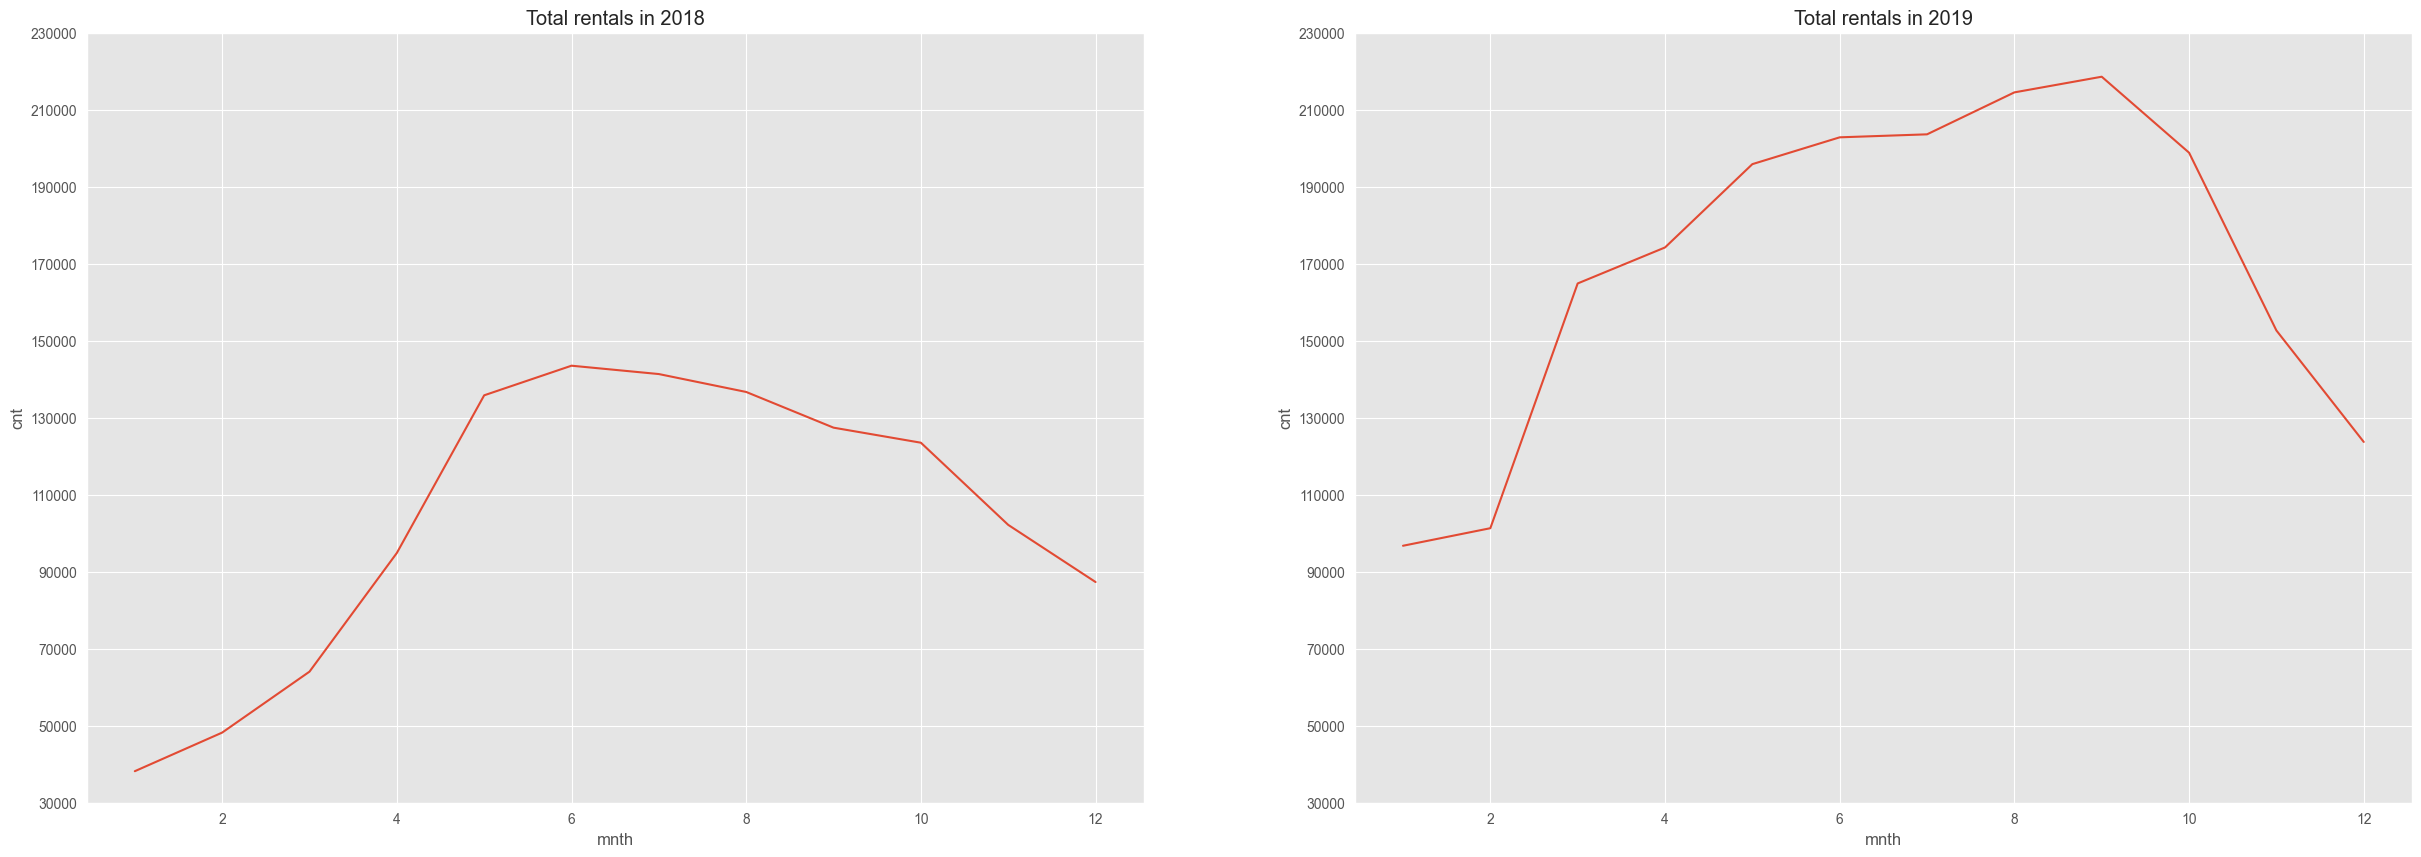

In [198]:
# Setting plot size
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.title('Total rentals in 2018')
ax5 = sns.lineplot(data=data.loc[data['yr']==0], x='mnth', y='cnt', estimator=sum, errorbar=None)                                      # Using estimator=sum to get the Total sum instead of default count
ax5.set_yticks(range(30000, 250000, 20000))                                                                                            # Set y-tick values for this plot

plt.subplot(1, 2, 2)
plt.title('Total rentals in 2019')
ax6 = sns.lineplot(data=data.loc[data['yr']==1], x='mnth', y='cnt', estimator=sum, errorbar=None)                                      # Using estimator=sum to get the Total sum instead of default count
ax6.set_yticks(range(30000, 250000, 20000))                                                                                            # Set y-tick values for this plot

plt.show()

In [199]:
# Checking by Percentage values
(data.groupby('mnth')['cnt'].sum() / data['cnt'].sum() * 100).sort_values(ascending=False)

mnth
8     10.671849
6     10.524409
9     10.513743
7     10.482049
5     10.079053
10     9.795417
4      8.177049
11     7.743634
3      6.956268
12     6.412821
2      4.543453
1      4.100254
Name: cnt, dtype: float64

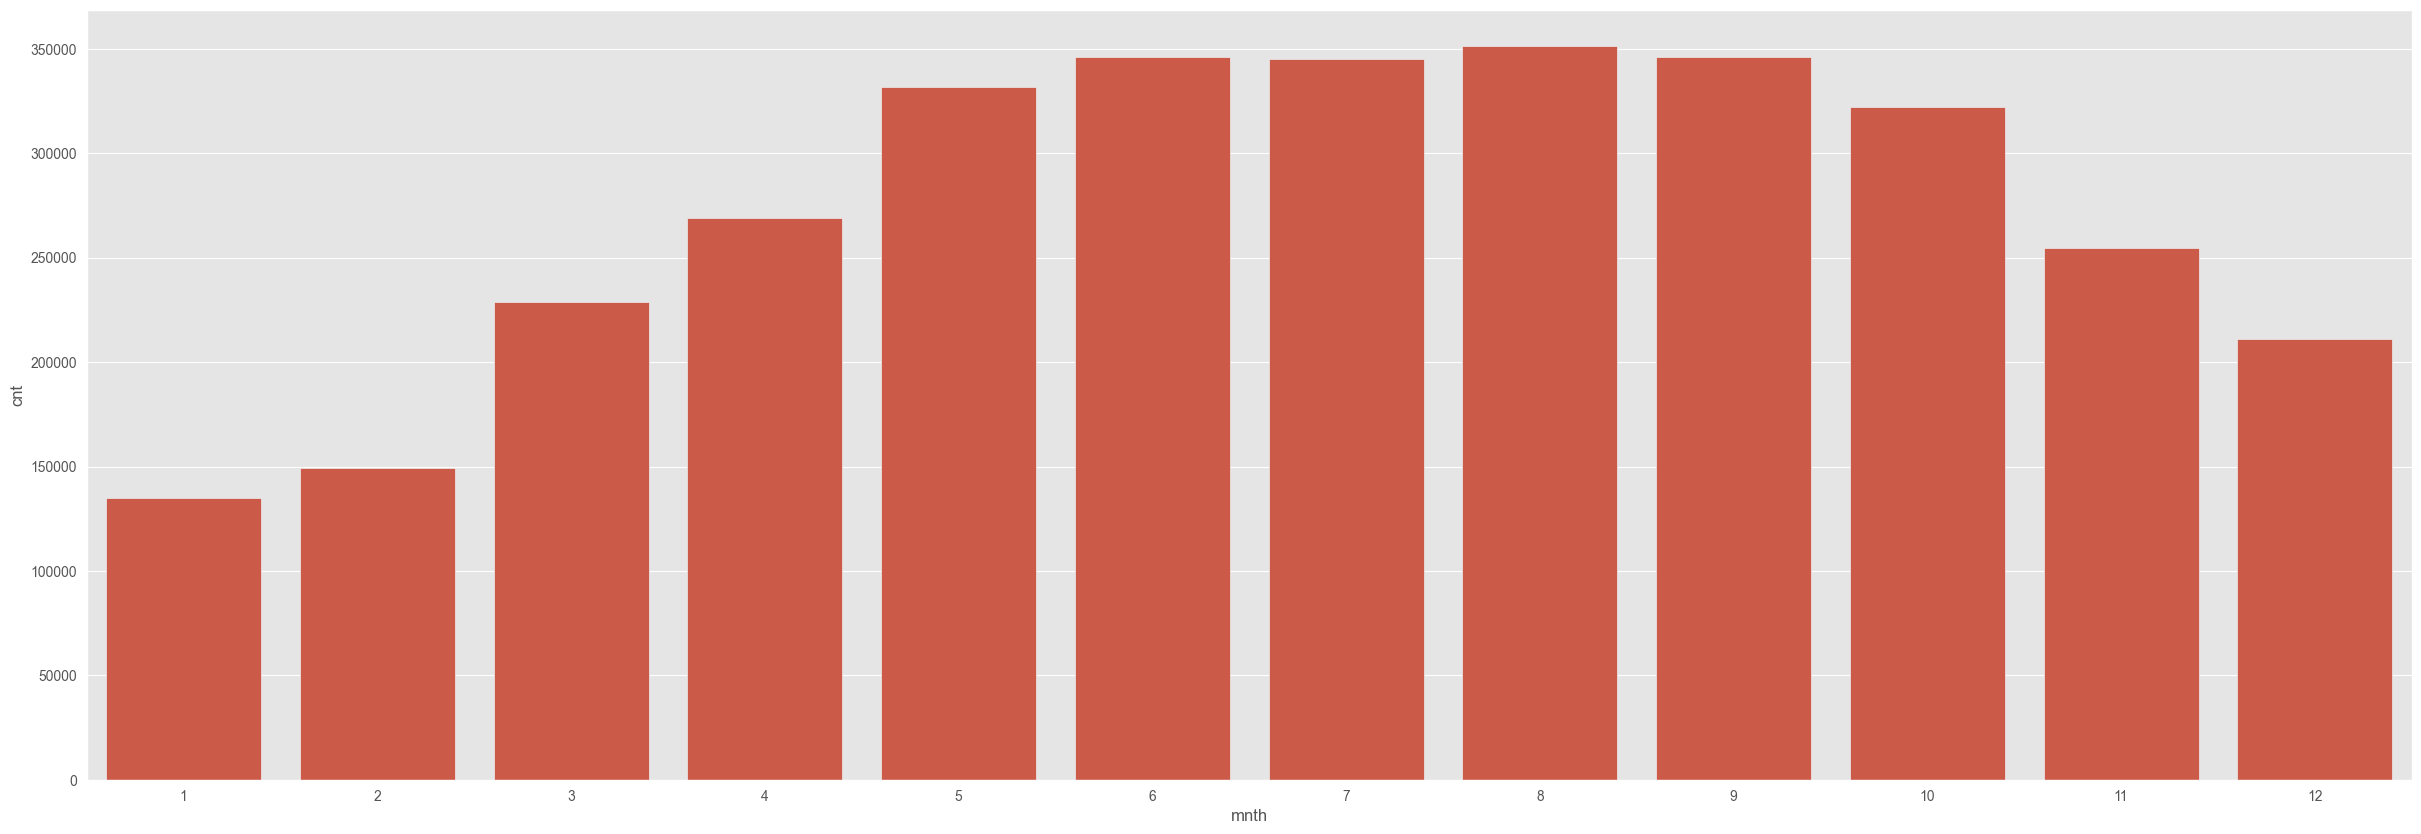

In [200]:
# Checking distribution irrespective of year
plt.figure(figsize=(30, 10))
sns.barplot(data.groupby('mnth')['cnt'].sum())
plt.show()

### Rentals across working days

In [201]:
# Creating dictionary for mapping
binary_mapping = {
    1: 'Yes',
    0: 'No'
}

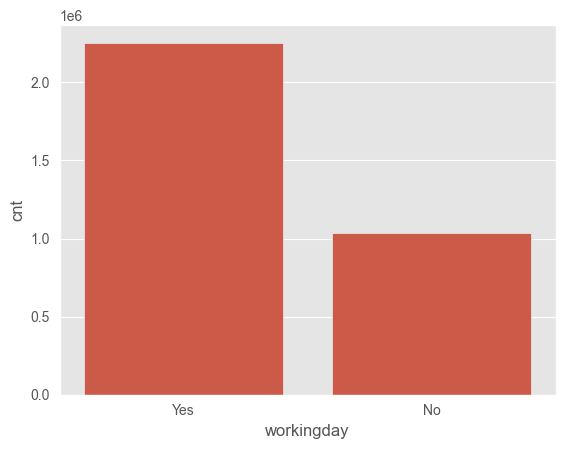

In [202]:
# Creating a barplot for rentals across working days
sns.barplot(data, x=data['workingday'].map(binary_mapping), y='cnt', estimator=sum, errorbar=None)
plt.show()

In [203]:
# Checking percentage distribution
(data.groupby('workingday')['cnt'].sum() / data['cnt'].sum() * 100)

workingday
0    31.507318
1    68.492682
Name: cnt, dtype: float64

### Rentals on Holidays

In [204]:
# Checking percentage distribution
data['holiday'].map(binary_mapping).value_counts(normalize=True) * 100

holiday
No     97.123288
Yes     2.876712
Name: proportion, dtype: float64

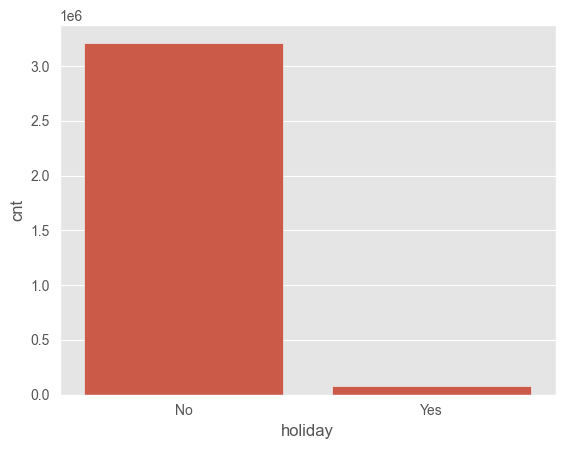

In [205]:
# Plotting barplot for total rentals on Holidays
sns.barplot(data, x=data['holiday'].map(binary_mapping), y='cnt', estimator=sum, errorbar=None)
plt.show()

### Rentals across week

In [206]:
# Creating dictionary for mapping days
day_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

In [207]:
# Adding dictionary values in the dataframe
data['weekday'] = data['weekday'].map(day_mapping)

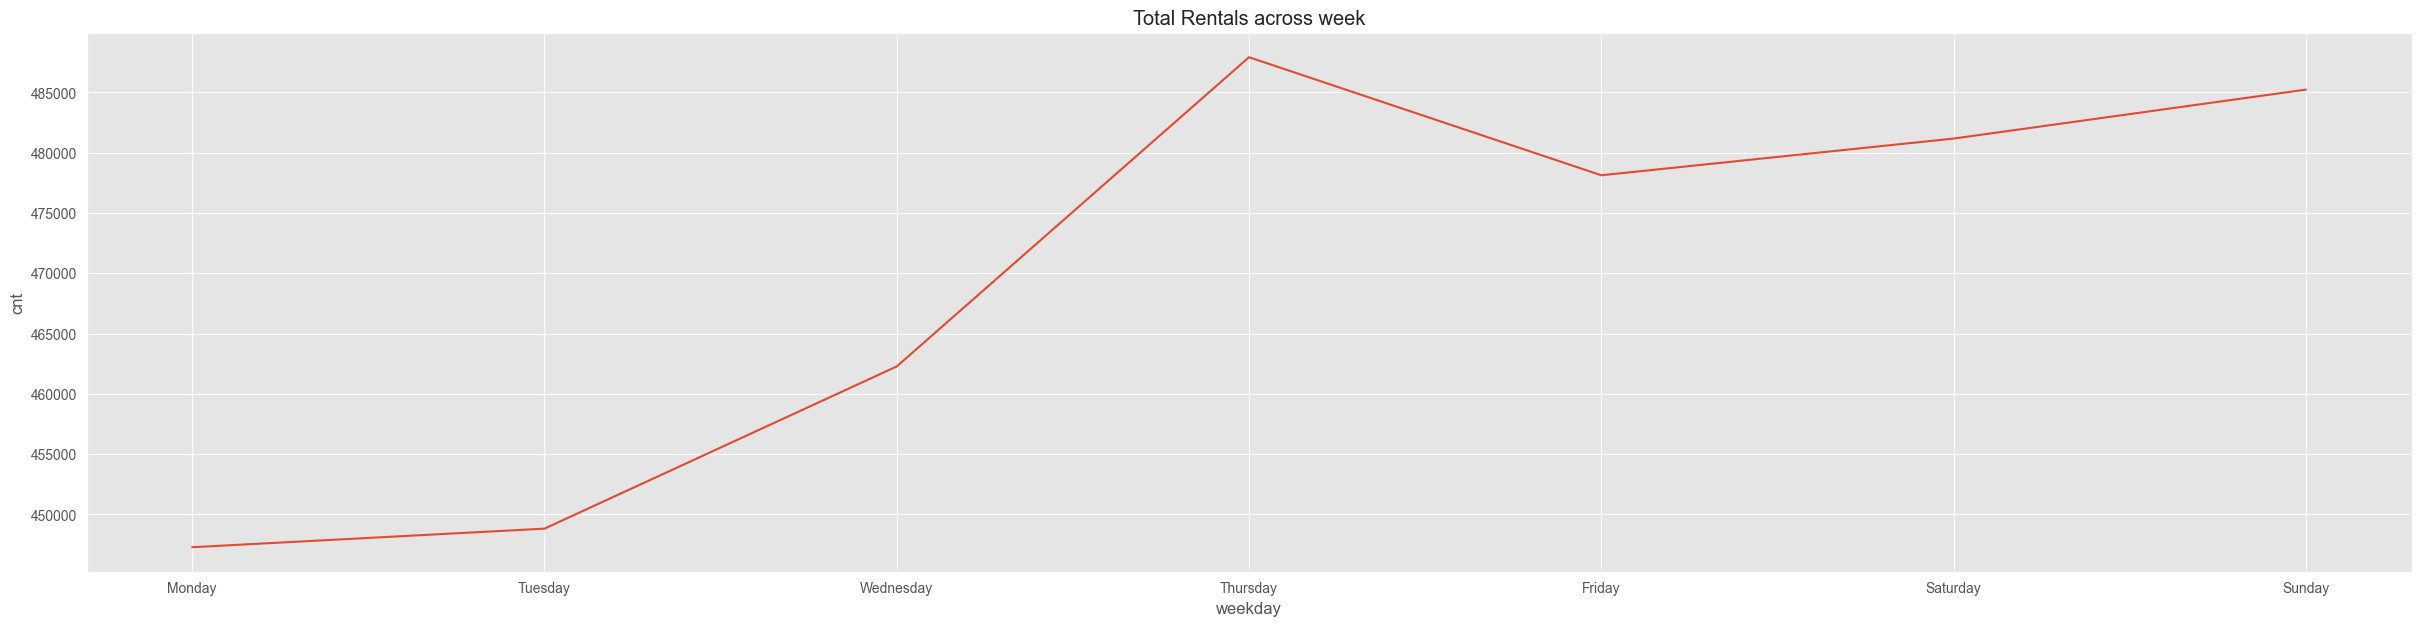

In [208]:
# Plotting a line plot for Total Rentals across week
plt.figure(figsize=(30, 7))
plt.title('Total Rentals across week')
sns.lineplot(data=data, x='weekday', y='cnt', estimator=sum, errorbar=None)
plt.show()

In [209]:
# Checking for percentage distribution since the peak on Thursday looks significant (visually), but is it though?
(data.groupby('weekday')['cnt'].sum() / data['cnt'].sum() * 100).sort_values(ascending=False)

weekday
Thursday     14.826678
Sunday       14.744997
Saturday     14.621655
Friday       14.529156
Wednesday    14.047334
Tuesday      13.638503
Monday       13.591676
Name: cnt, dtype: float64

### Rentals across Seasons

In [210]:
# Create mapping for Season
season = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

In [211]:
# Mapping season dictionary to the dataframe
data['season'] = data['season'].map(season)

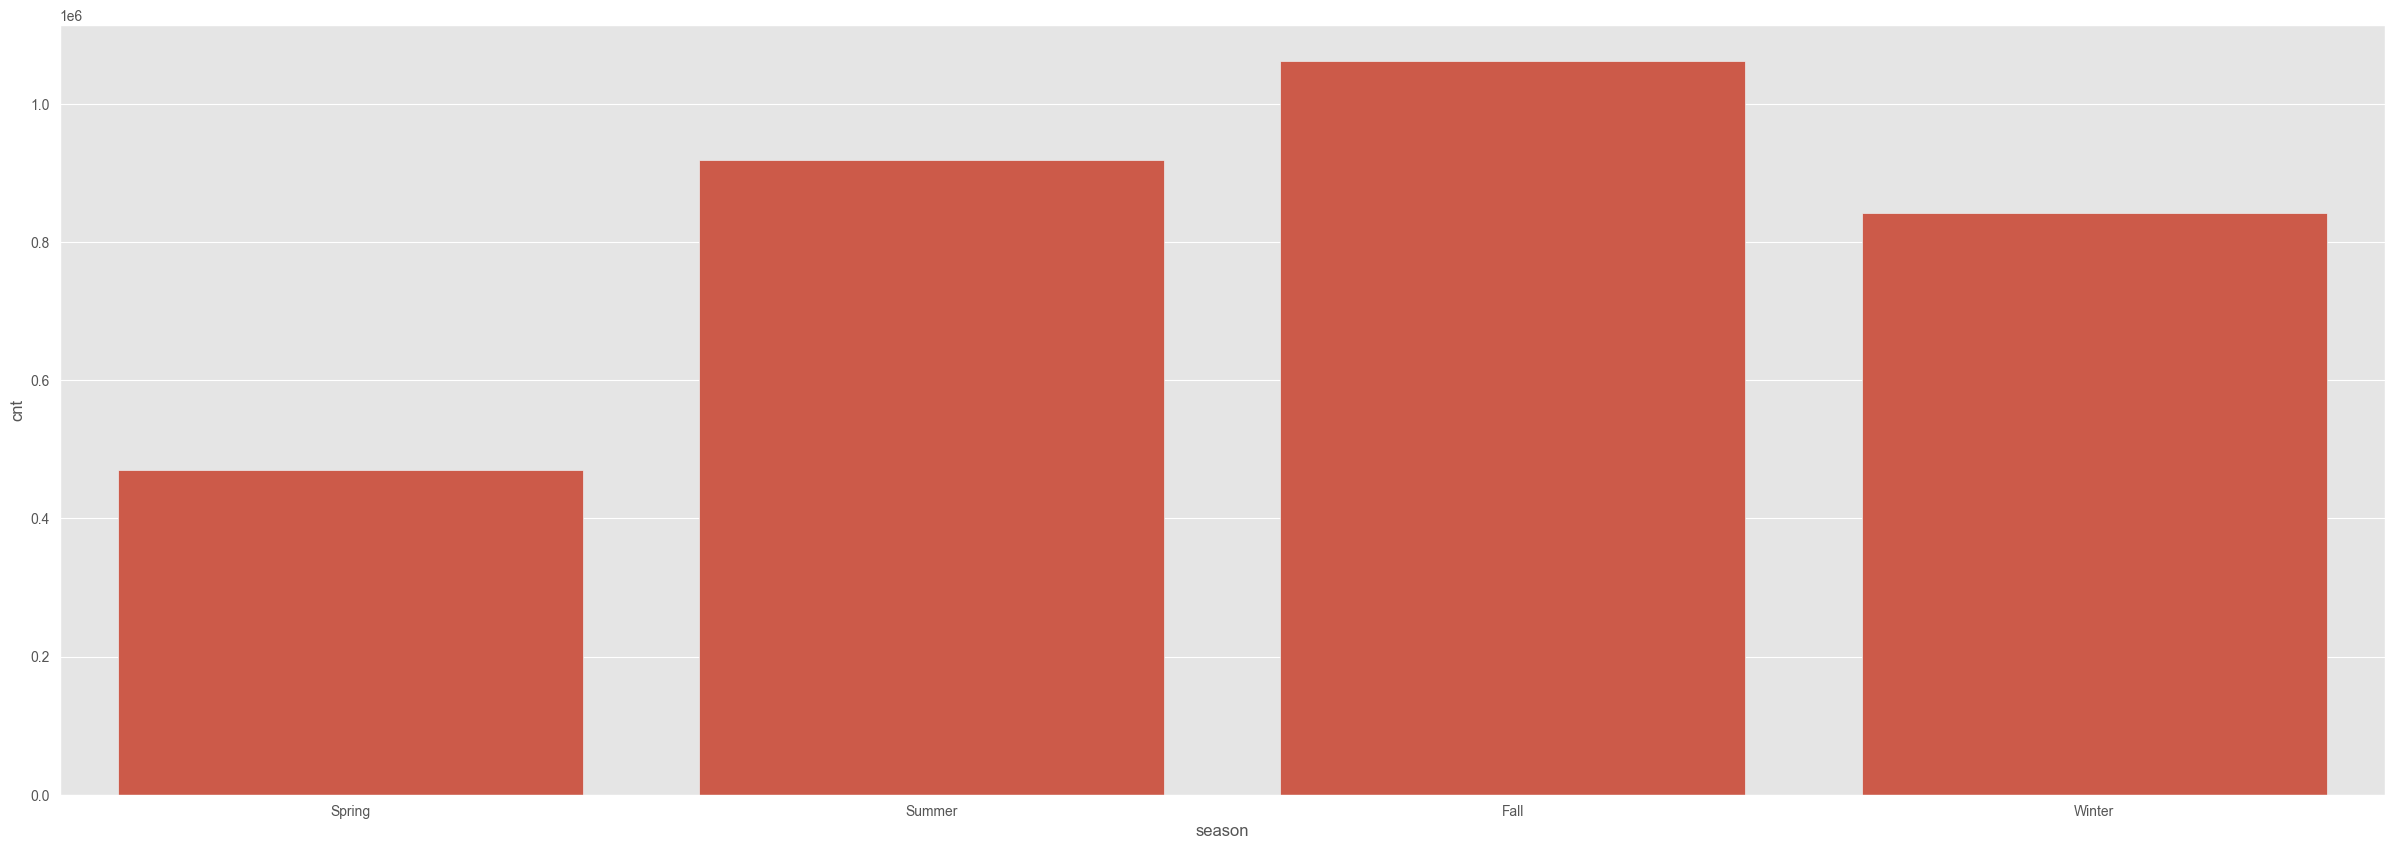

In [212]:
# Plotting bar chart of total rentals across seasons
plt.figure(figsize=(30, 10))
sns.barplot(data=data, x='season', y='cnt', estimator=sum, errorbar=None)
plt.show()

In [213]:
# Checking for percentage distribution
(data.groupby('season')['cnt'].sum() / data['cnt'].sum() * 100).sort_values(ascending=False)

season
Fall      32.244879
Summer    27.913469
Winter    25.574374
Spring    14.267278
Name: cnt, dtype: float64

### Rentals based on Weather

In [214]:
# Create mapping for Weather
weather = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light snow/rain',
    4: 'Heavy snow/rain',
}

In [215]:
# Mapping weather to the dataframe
data['weathersit'] = data['weathersit'].map(weather)

In [216]:
# Checking for percentage distribution
data.groupby('weathersit')['cnt'].sum() / data['cnt'].sum() * 100

weathersit
Clear              68.613137
Light snow/rain     1.150738
Misty              30.236125
Name: cnt, dtype: float64

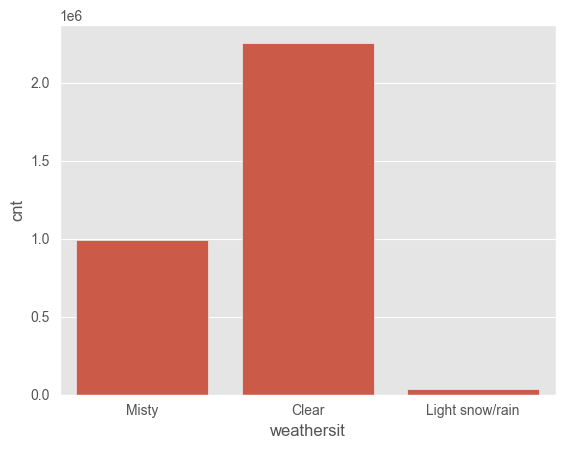

In [217]:
# Creating a bar plot of total rentals with weather
sns.barplot(data=data, x='weathersit', y='cnt', estimator=sum, errorbar=None)
plt.show()

### Rentals with Temperature

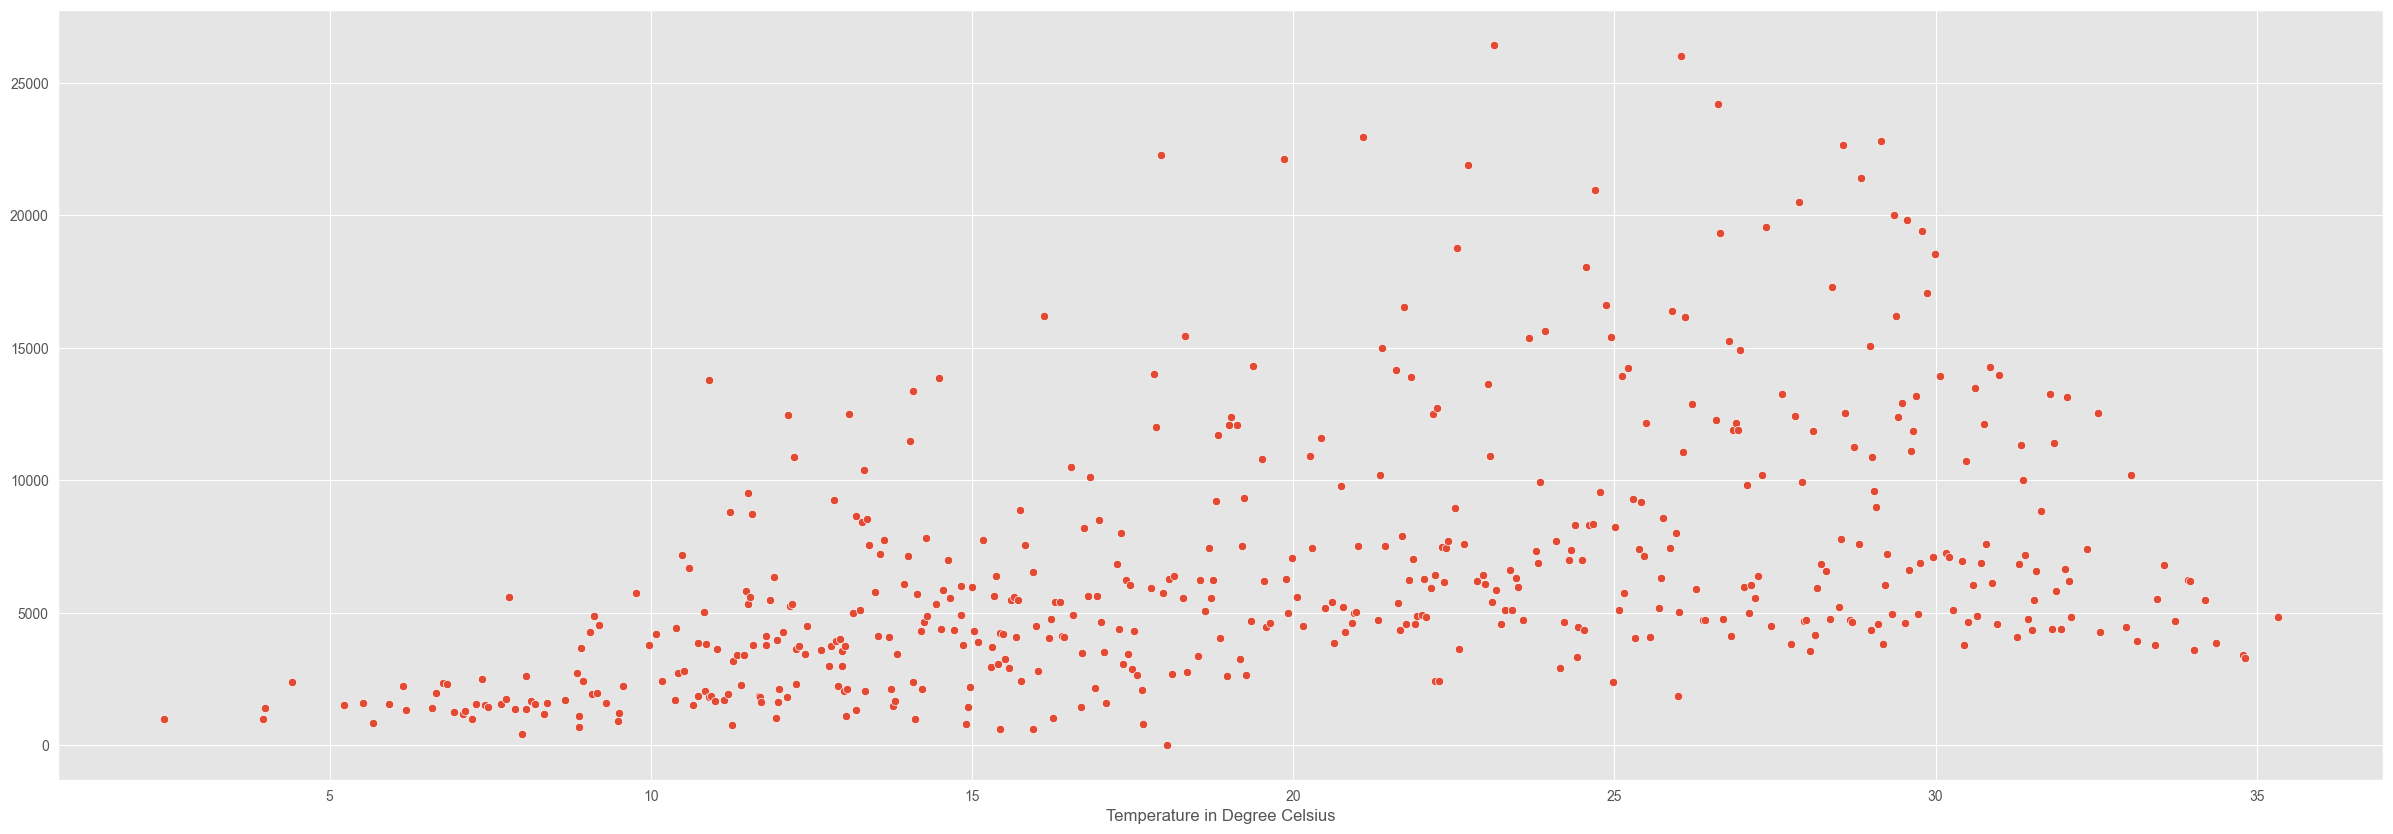

In [218]:
# Plotting scatterplot to check for relationship between temperature and rentals
plt.figure(figsize=(30, 10))

# Group data by temperature and calculate sum of 'cnt' for each group
data_grouped_temp = data.groupby('temp')['cnt'].sum()

# Create a scatterplot with y-axis showing the sum
sns.scatterplot(x=data_grouped_temp.index, y=data_grouped_temp.values)
plt.xlabel('Temperature in Degree Celsius')

plt.show()

### Rentals with Feeling Temperature

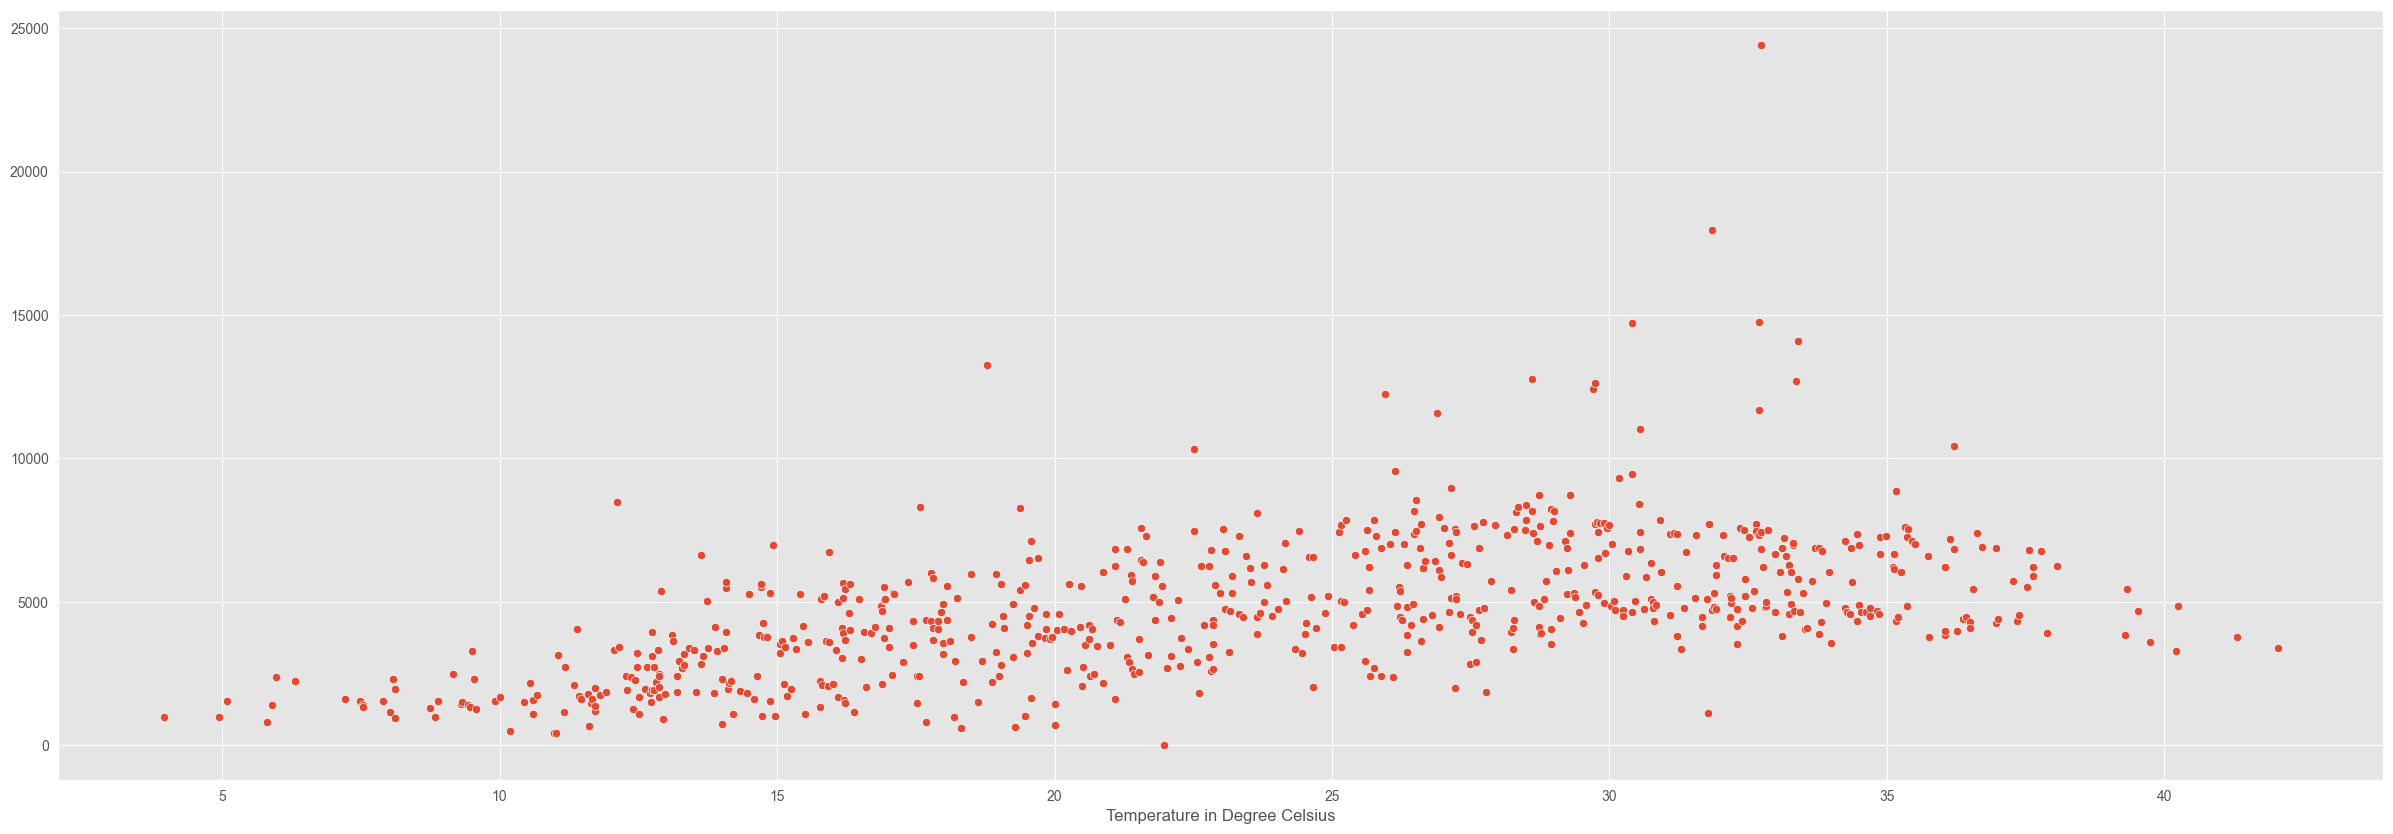

In [219]:
# Plotting scatterplot to check for relationship between feeling temperature and rentals
plt.figure(figsize=(30, 10))

# Group data by temperature and calculate sum of 'cnt' for each group
data_grouped_atemp = data.groupby('atemp')['cnt'].sum()

# Create a scatterplot with y-axis showing the sum
sns.scatterplot(x=data_grouped_atemp.index, y=data_grouped_atemp.values)
plt.xlabel('Temperature in Degree Celsius')

plt.show()

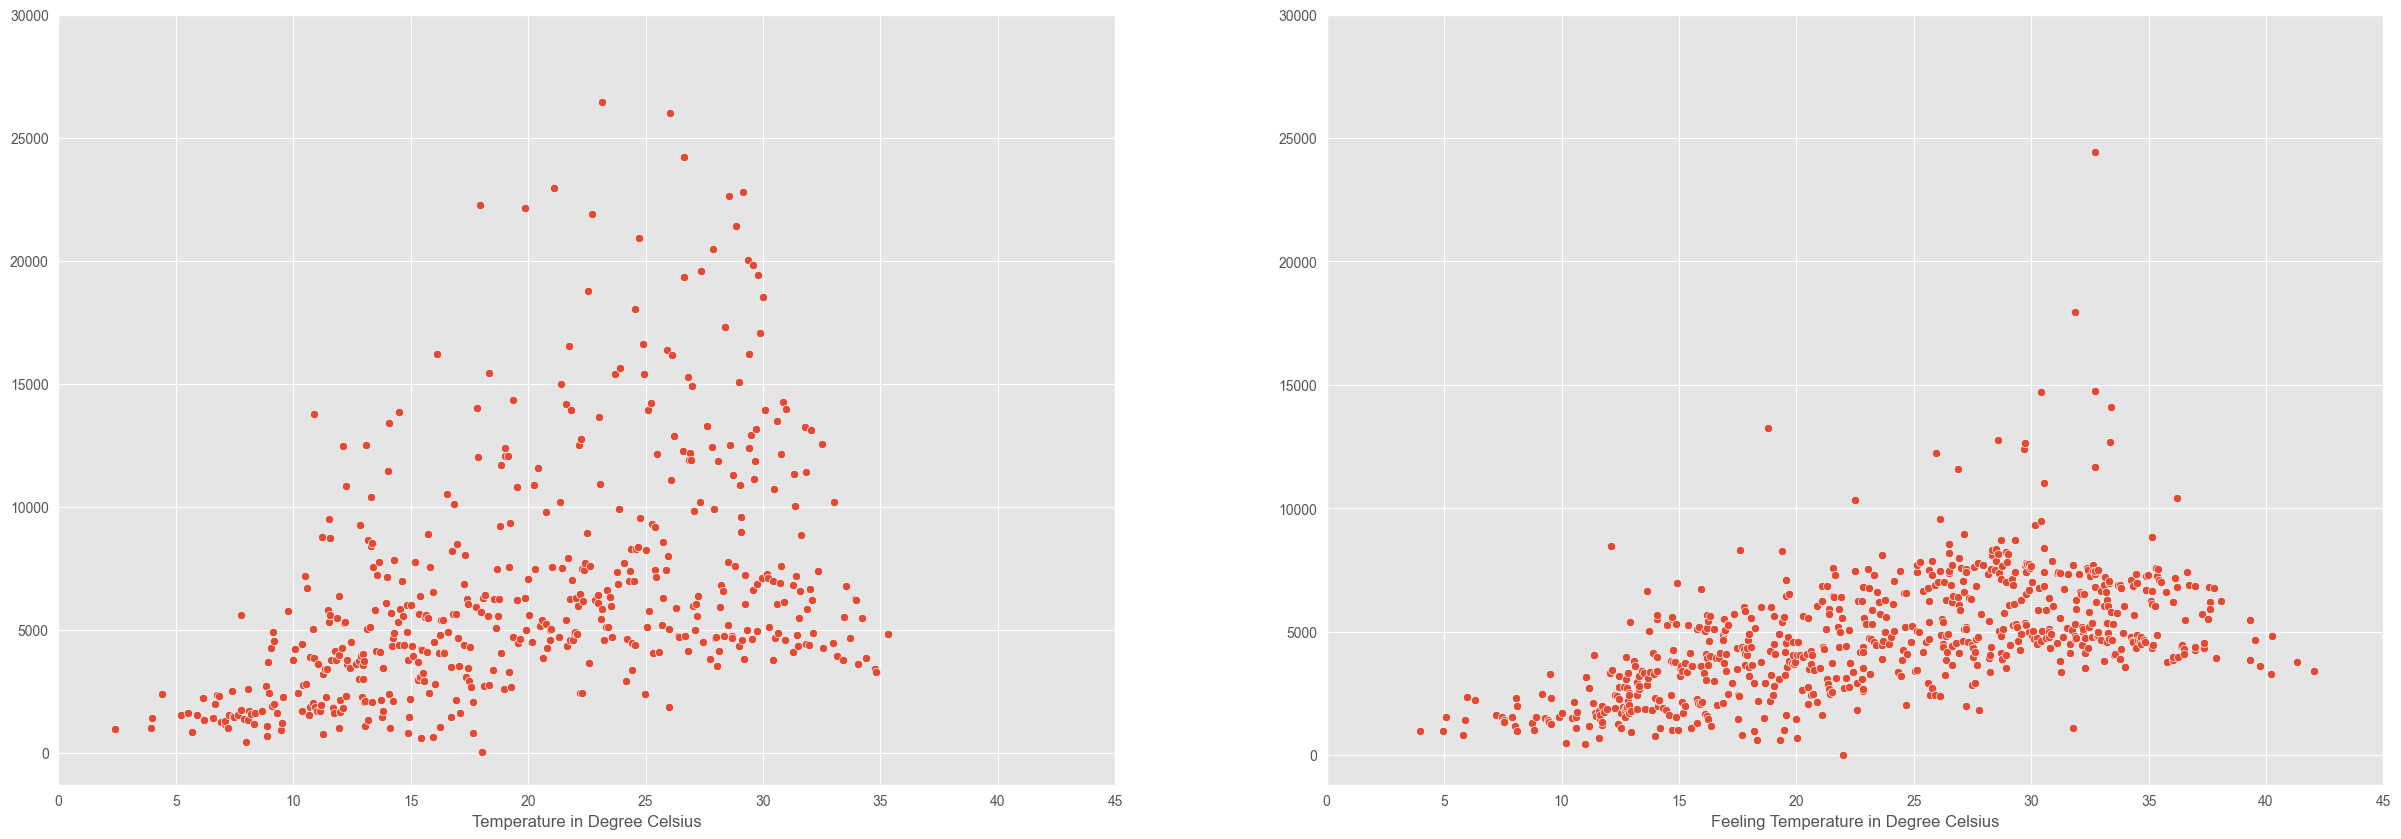

In [220]:
# Comparing scatterplots to check for relationship between temperature(s) and rentals
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
ax7 = sns.scatterplot(x=data_grouped_temp.index, y=data_grouped_temp.values)
ax7.set_yticks(range(0, 35000, 5000))                                                                                       # Set y-tick values for this plot
ax7.set_xticks(range(0, 50, 5))                                                                                             # Set x-tick values for this plot
plt.xlabel('Temperature in Degree Celsius')

plt.subplot(1, 2, 2)
ax8 = sns.scatterplot(x=data_grouped_atemp.index, y=data_grouped_atemp.values)
ax8.set_yticks(range(0, 35000, 5000))                                                                                       # Set y-tick values for this plot
ax8.set_xticks(range(0, 50, 5))                                                                                             # Set x-tick values for this plot
plt.xlabel('Feeling Temperature in Degree Celsius')

plt.show()

In [221]:
# Creating dataframe to check for percentage distribution w.r.t. Total Rentals
data_grouped_temp_1 = data.groupby('temp')['cnt'].sum() / data['cnt'].sum() * 100

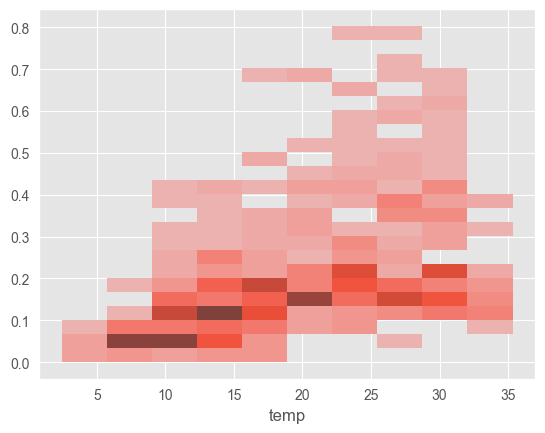

In [222]:
# Plotting a histogram to check for concentrations
# plt.figure(figsize=(30, 10))
sns.histplot(x=data_grouped_temp_1.index, y=data_grouped_temp_1.values)
plt.show()

### Rentals with Windspeeds

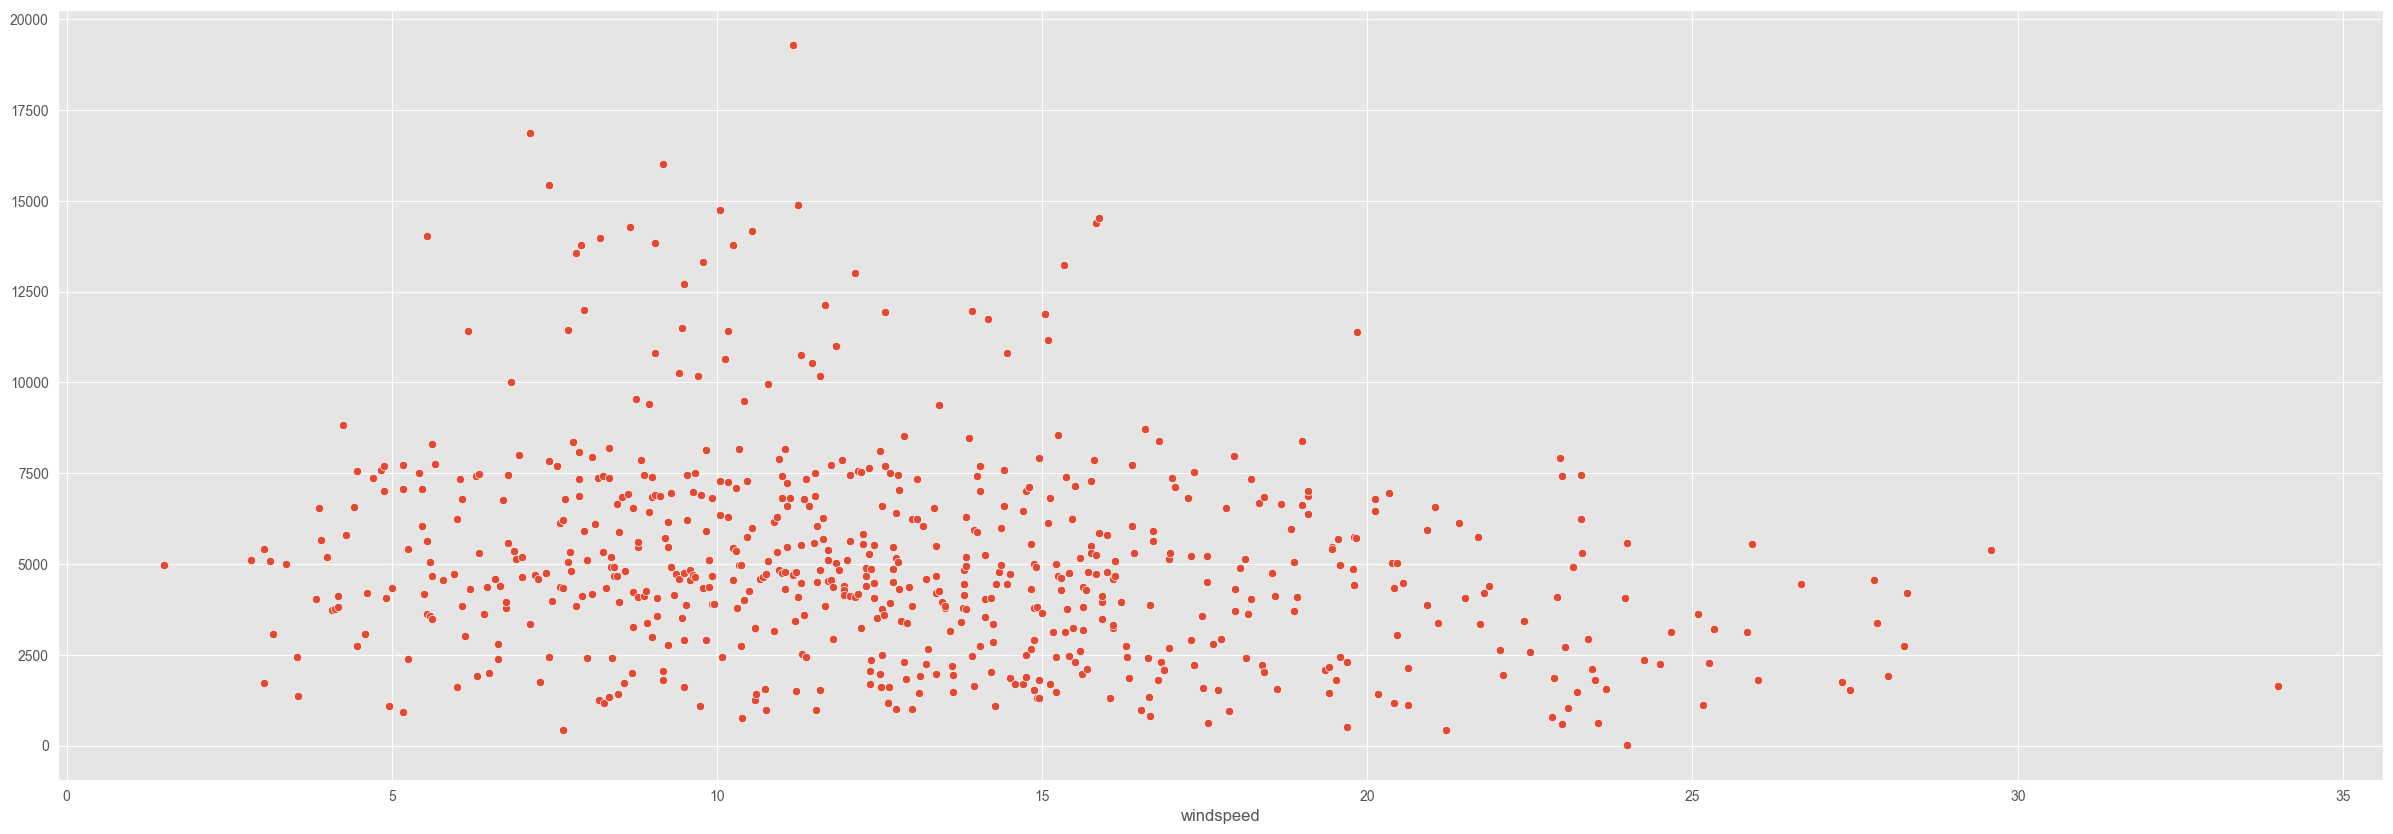

In [223]:
# Plotting scatterplot to check for relationship between feeling windspeed and rentals
plt.figure(figsize=(30, 10))

# Group data by windspeed and calculate sum of 'cnt' for each group
data_grouped = data.groupby('windspeed')['cnt'].sum()

# Create a scatterplot with y-axis showing the sum
sns.scatterplot(x=data_grouped.index, y=data_grouped.values)

plt.show()

In [224]:
# Creating dataframe to check for percentage distribution w.r.t. Total Rentals
data_grouped_windspeed = data.groupby('windspeed')['cnt'].sum() / data['cnt'].sum() * 100

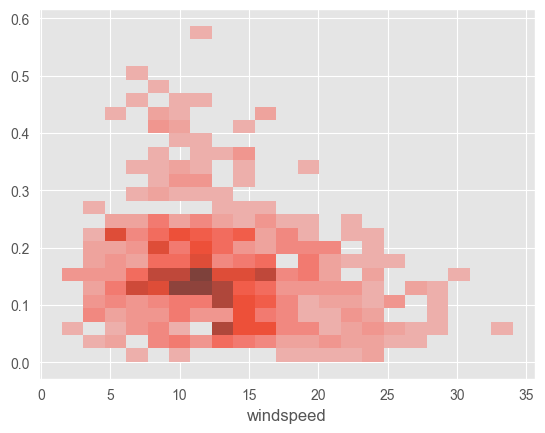

In [225]:
# Plotting a histogram to check for concentrations
# plt.figure(figsize=(30, 10))
sns.histplot(x=data_grouped_windspeed.index, y=data_grouped_windspeed.values)
plt.show()

### Rentals with Humidity

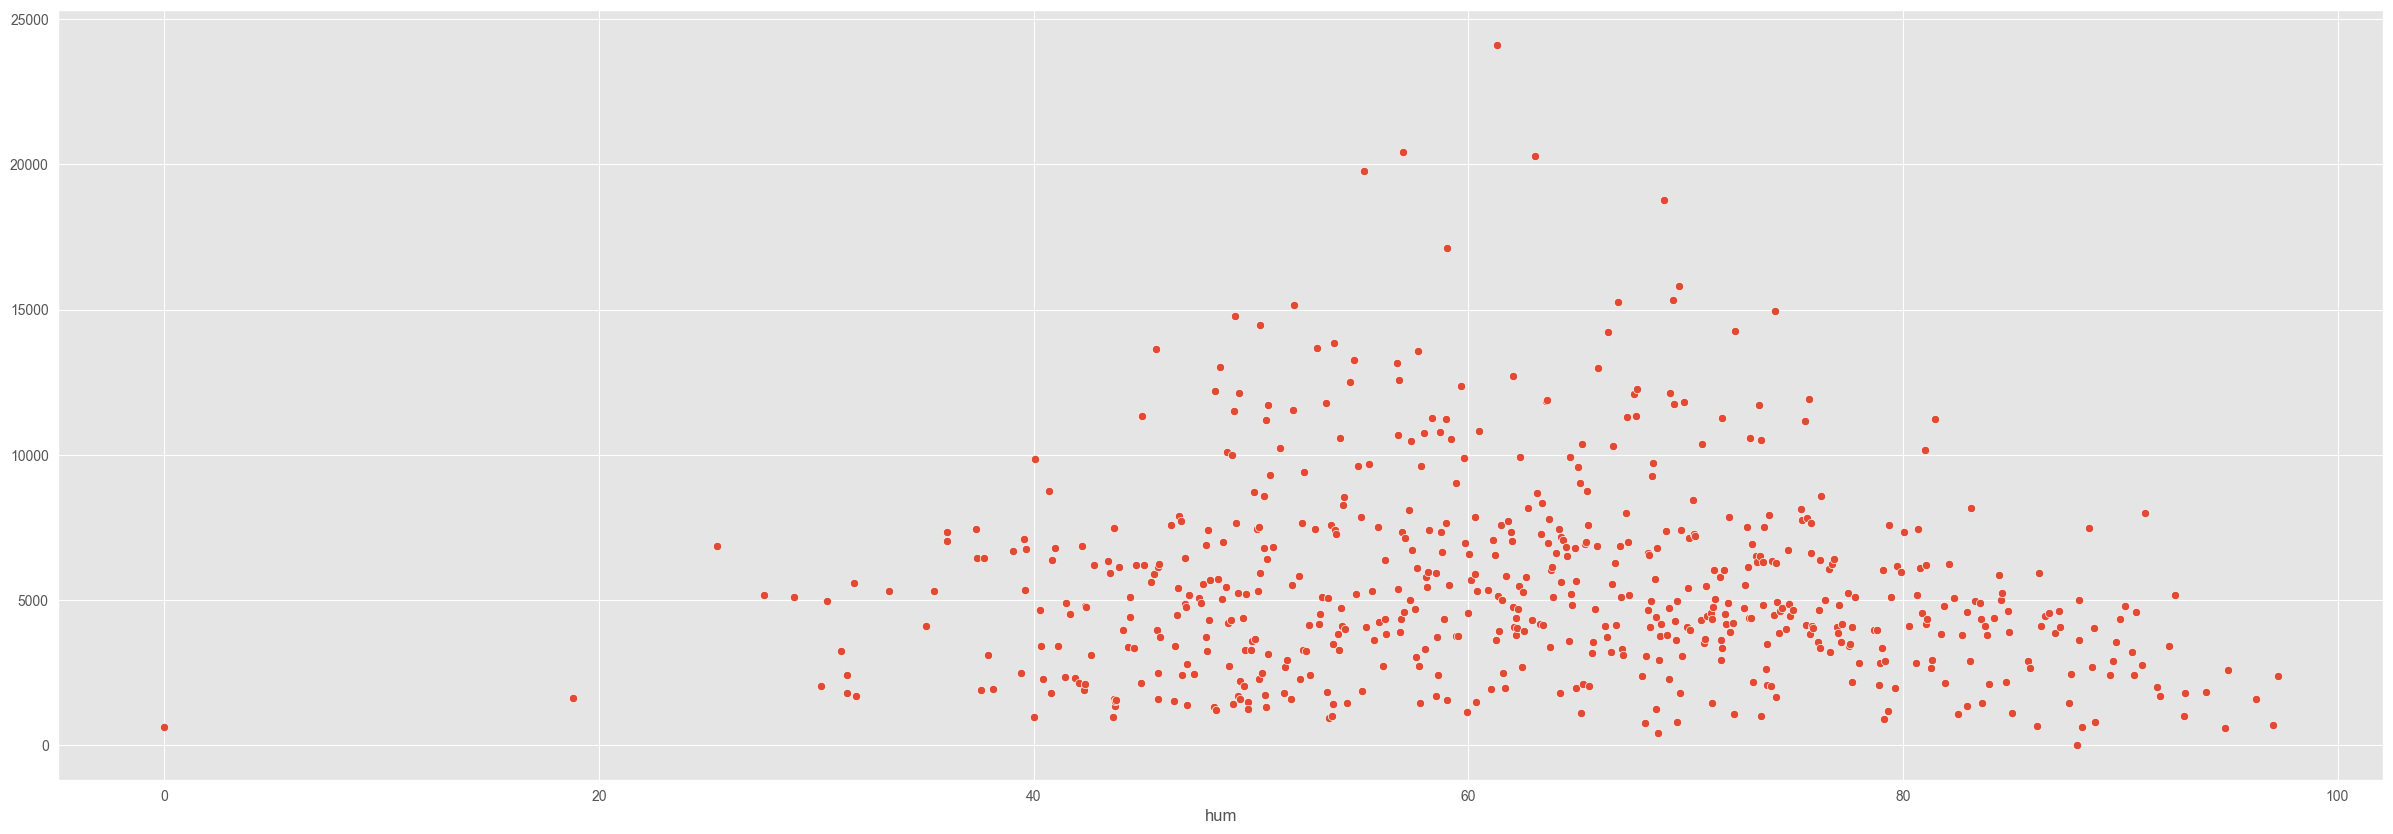

In [226]:
# Plotting scatterplot to check for relationship between feeling humidity and rentals
plt.figure(figsize=(30, 10))

# Group data by humidity and calculate sum of 'cnt' for each group
data_grouped = data.groupby('hum')['cnt'].sum()

# Create a scatterplot with y-axis showing the sum
sns.scatterplot(x=data_grouped.index, y=data_grouped.values)

plt.show()

In [227]:
# Creating dataframe to check for percentage distribution w.r.t. Total Rentals
data_grouped_humidity = data.groupby('hum')['cnt'].sum() / data['cnt'].sum() * 100

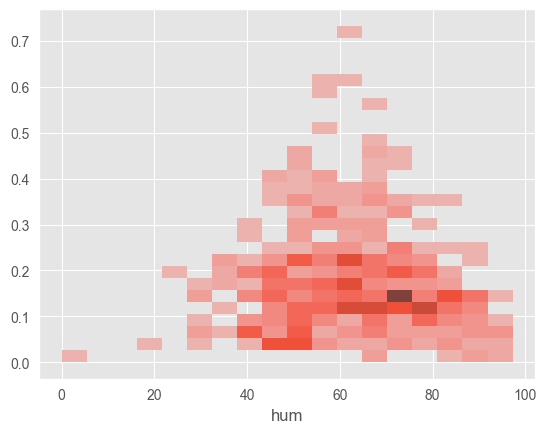

In [228]:
# Plotting a histogram to check for concentrations
# plt.figure(figsize=(30, 10))
sns.histplot(x=data_grouped_humidity.index, y=data_grouped_humidity.values)
plt.show()

### Rentals with environment factors

In [229]:
# Creating a dataframe for the environmental factors
data_grouped = data.groupby(['weathersit', 'season', 'temp', 'atemp', 'hum', 'windspeed'])['cnt'].sum().reset_index()

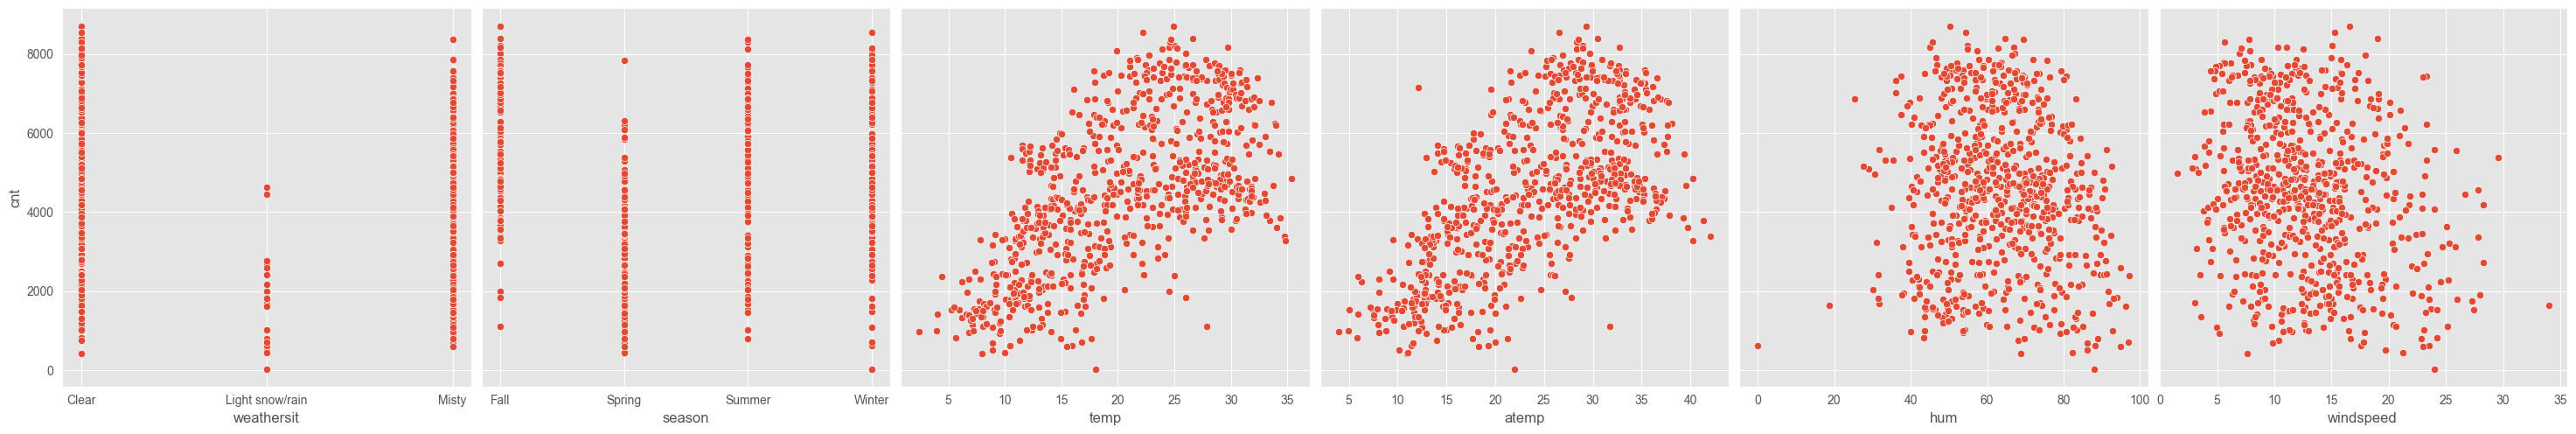

In [230]:
# Creating a pairplot to visualise the relationship between the environmental factors
sns.pairplot(data_grouped, x_vars=['weathersit', 'season', 'temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'], height=5)
plt.show()

### Co-relation Matrix between environmental variables

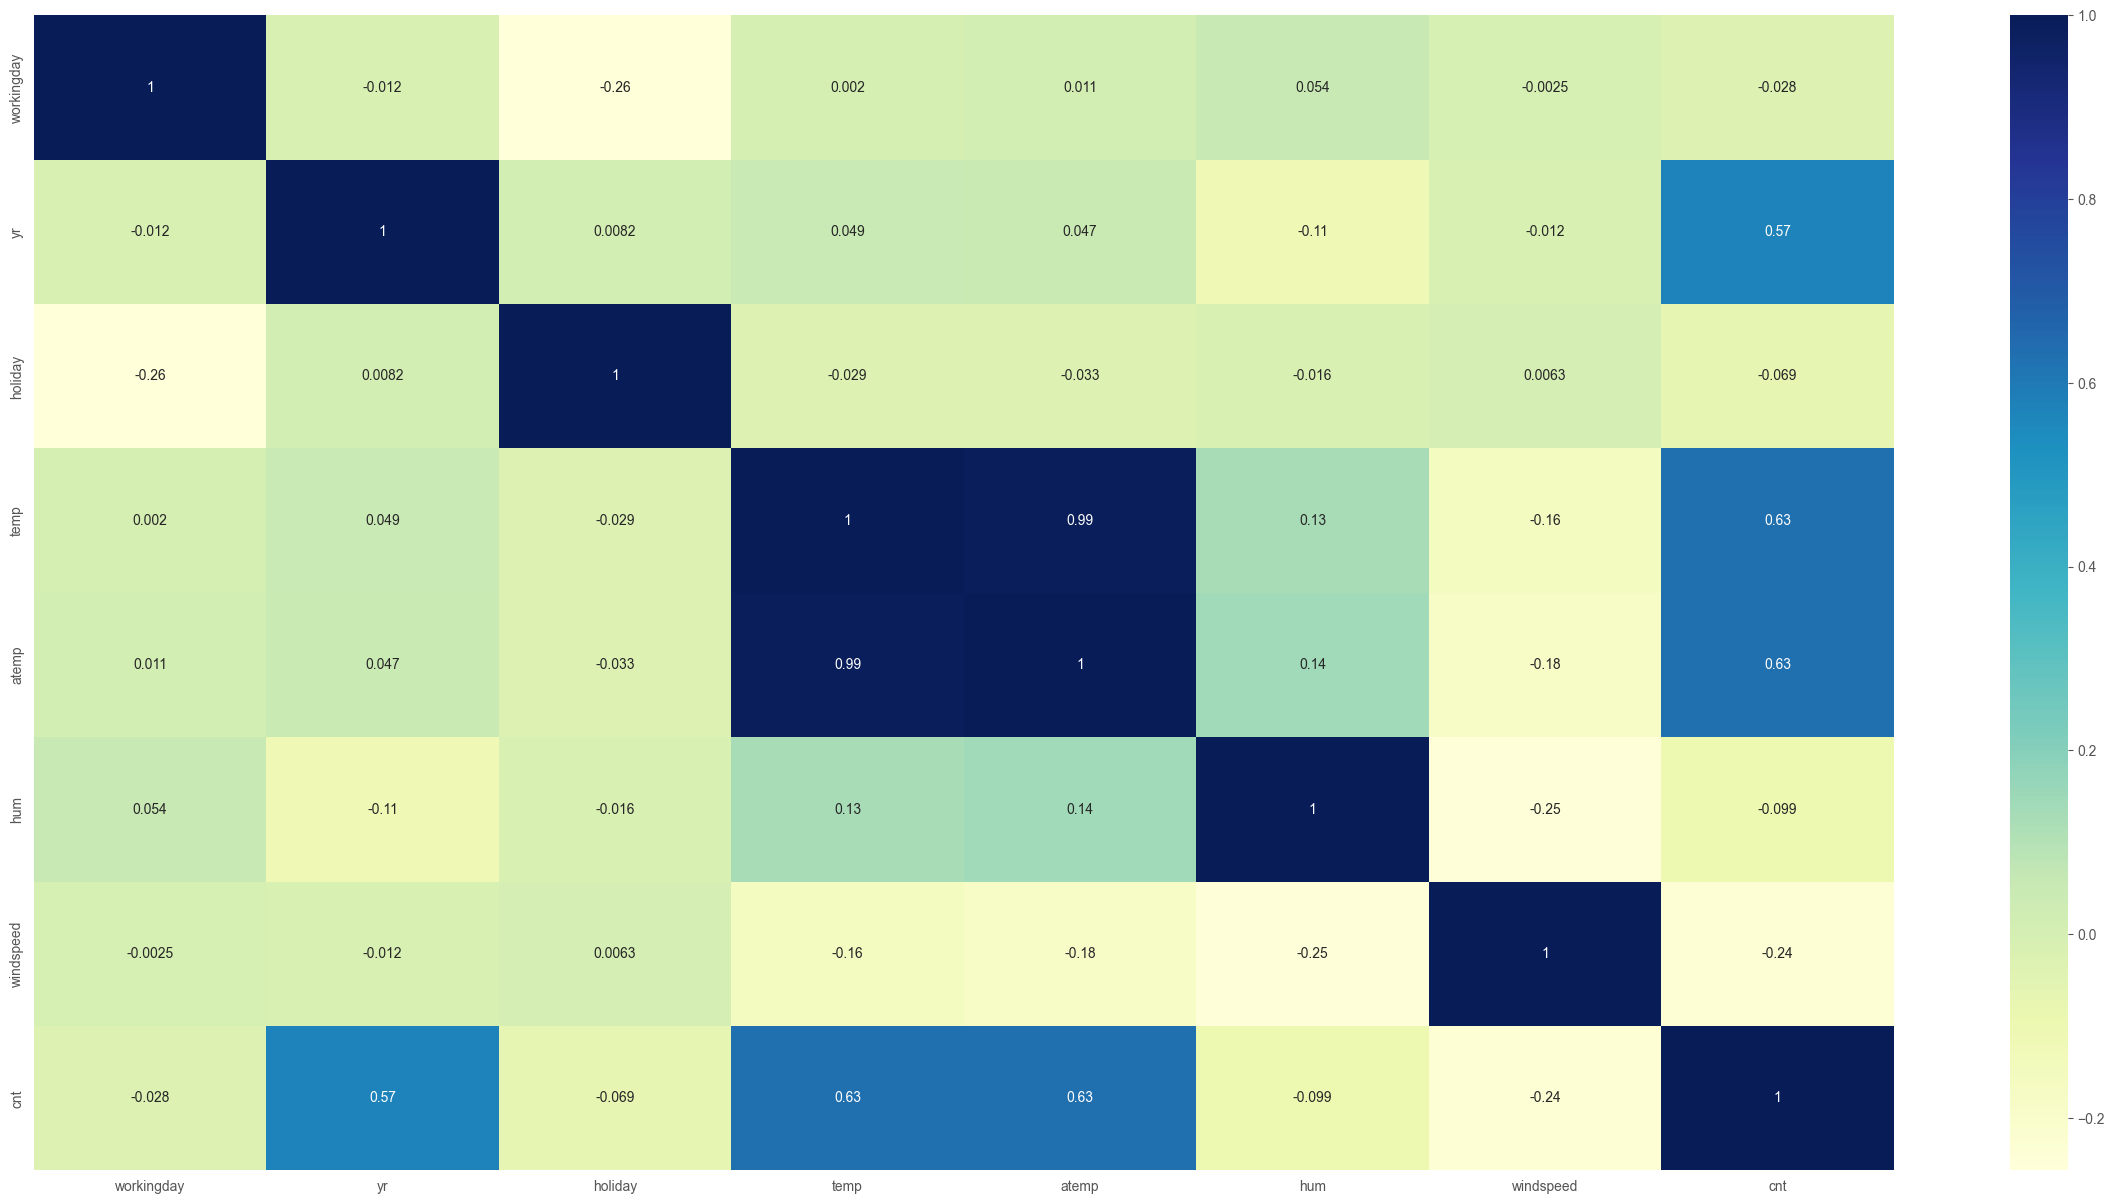

In [231]:
# Creating a pairplot to visualise the relationship between the environmental factors
plt.figure(figsize=(30, 15))
sns.heatmap(data[['workingday', 'yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='YlGnBu')
plt.show()

<Figure size 3000x1500 with 0 Axes>

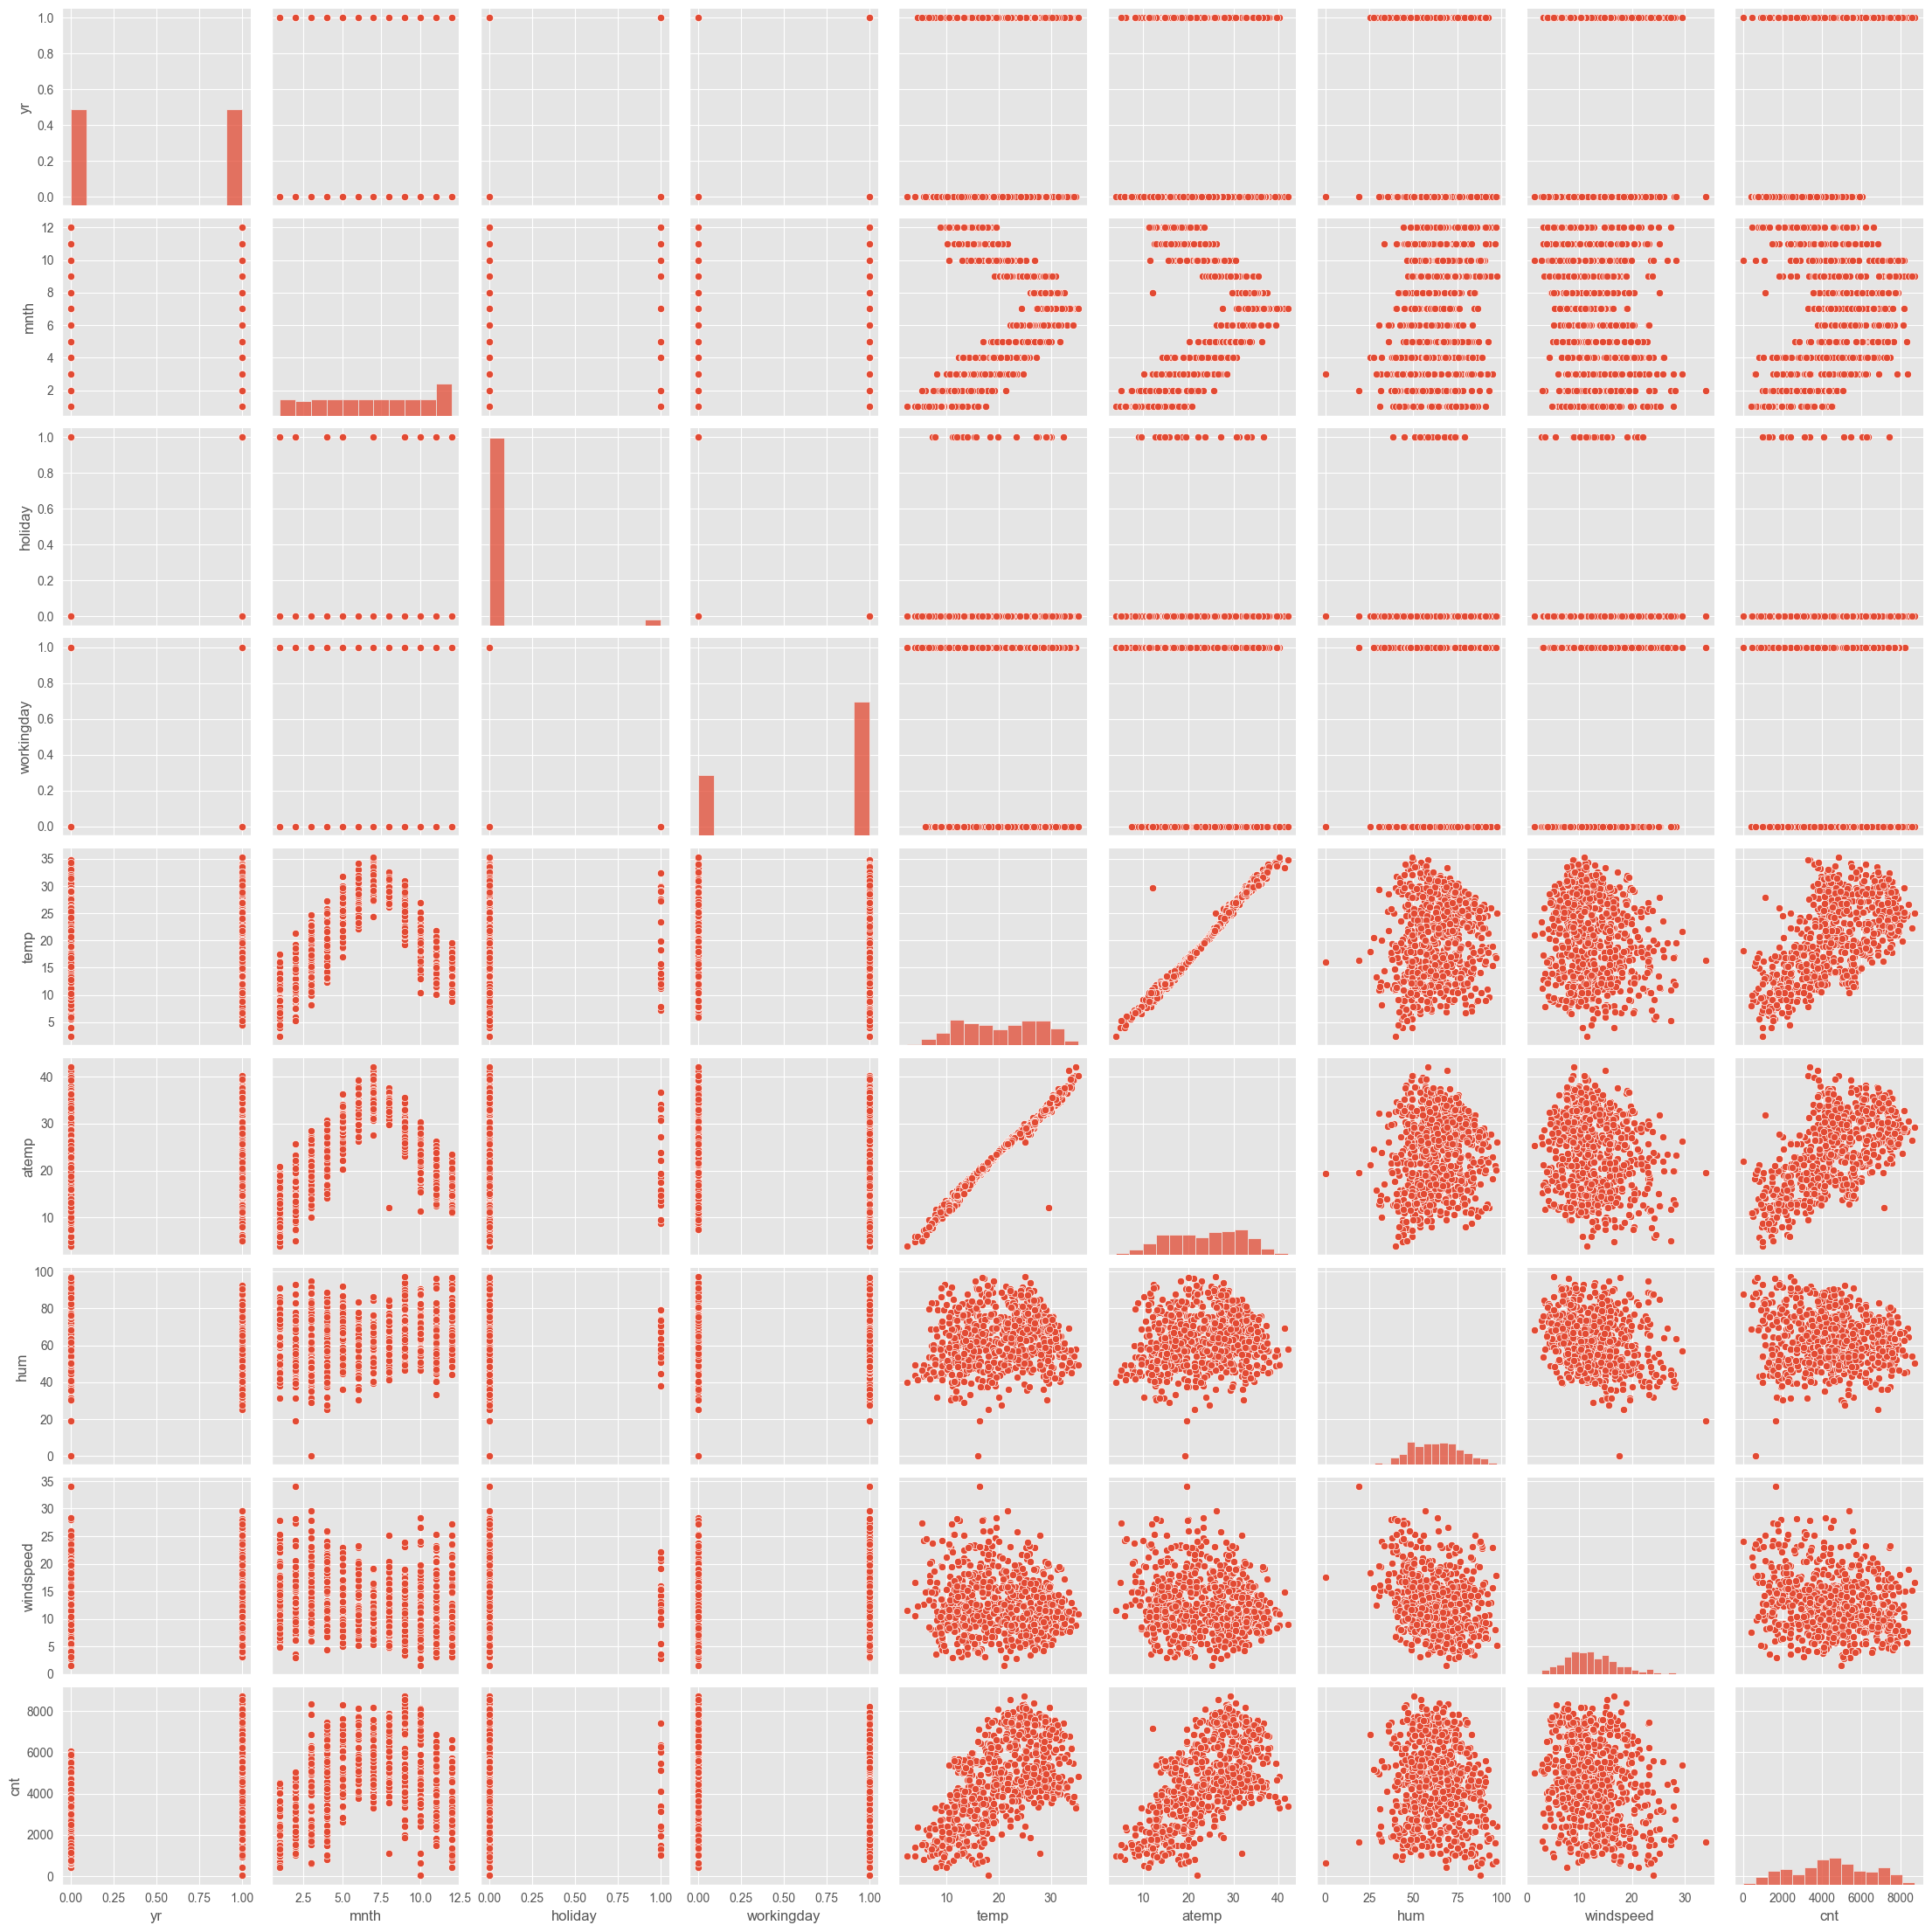

In [232]:
plt.figure(figsize=(30, 15))
sns.pairplot(data)
plt.show()

### Activities Performed / Inferences
___
1. Prepared Box-plots for numerical columns to visually identify presence of any outliers.
2. Plotted linear regression model fit for categorical variables.
3. Prepared Box plot for each categorical columns.
4. Prepared barplots and histplot for variables.
5. Prepare co-relation matrix chart for environmental variables (temp, windspeed, humidity, etc.)
6. Only the 'windspeed' column have few outliers. We will not be removing it unless we identify that it's impacting or not required by the model.
7. Temp and atemp variables demonstrated a good linear fit. Since temp and atemp are related variables, the plots were also very similar to each other.
8. Windspeed showed a negative linear fit wherein the reduced windspeeds showed a slight increase in the rentals.
9. Humidity showed a neutral linear fit w.r.t. Total rentals.
10. Season 3 (Fall) shows the highest rentals followed by Season 2 (Summer) and 4 (Winter). Lowest rentals are in Season 1 (Spring). ```Useful insight for Recursive Feature Elimination```
11. 2019 showed more rentals when compared with 2018.
12. 97% of the rentals occurs when there's no Holiday, proving that the data is skewed/biased and not reliable for prediction. With such a high percentage of bookings on non-holidays, using "holiday" as a predictor wouldn't be very helpful. It won't accurately forecast bike booking numbers because the vast majority of bookings happen regardless of holidays. ```Useful insight for Recursive Feature Elimination```
13. Weekday variable shows very close trend of between 13.59% to 14.83% of total booking. This variable can have some or no influence towards the predictor.
14. About 68.49% of the bike bookings were happening on a 'workingday'. This indicates, workingday can be a good predictor for the dependent variable. ```Useful insight for Recursive Feature Elimination```
15. About 68.61% of the bike bookings were happening on a 'Clear' day, followed by 30.26% on a 'Misty' day. This indicates, weathersit can be a good predictor for the dependent variable. ```Useful insight for Recursive Feature Elimination```
16. In Month variable, months between May to September show very close trend of between 10.07% to 10.67%. Next adjacent months, April and October show a very close trend between 8.17% and 7.74% respectively. ```Useful insight for Recursive Feature Elimination```
17. Variables 'temp' and 'atemp' are highly co-related and would probably cause high variance. Either of the variable would have to be dropped as both of them together would inflate the VIF value. Bike holders prefer temperatures between 10 and 30 degree Celsius. ```Useful insight for Recursive Feature Elimination```
18. Bike holders prefer lower windspeeds. ```Useful insight for Recursive Feature Elimination```
19. Bike holders prefer humidity between 40 to 80%. ```Useful insight for Recursive Feature Elimination```
20. Variables like weathersit, season, temp/atemp, hum and windspeed are essentially environmental factors that are often co-related to each other. For e.g. Summers would lead to high temperature which could also get affected by windspeed and humidity levels. As such, these variables needs to be carefully considered. ```Useful insight for Recursive Feature Elimination```

## Data Preparation
___

### Convert to 'category' data type

In [233]:
data['season'] = data['season'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')
data['mnth'] = data['mnth'].astype('category')
data['weekday'] = data['weekday'].astype('category')

### Create dummy variables

In [234]:
data = pd.get_dummies(data, columns=['weathersit', 'season', 'mnth', 'weekday'], drop_first=True)

In [235]:
# Checking the newly created dummy variables
data.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   weathersit_Light snow/rain  weathersit_Misty  ...  mnth_9  mnth_10  \
0                       False              True  ...   False    False   
1                       False              True  ...   False    False   
2                       False             False  ...   False    False   
3                       False             False  ...   False    False   
4                       False             False  ...   False    False   

   mnth_11  mnth_12  weekday_Monday  weekday_Saturday  weekday_Sunday  \
0    False    False            True             False           False   
1    False    False           False             False           False   
2    False    False           False             False           False   
3    False    False           False             False           False   
4    False    False           False             False           False   

   weekday_Thursday  weekday_Tuesday  weekday_Wednesday  
0             False            False              False  
1             False             True              False  
2             False            False               True  
3              True            False              False  
4             False            False              False  

[5 rows x 30 columns]

### Checking linear relationship

In [236]:
# Checking shape of data
data.shape

(730, 30)

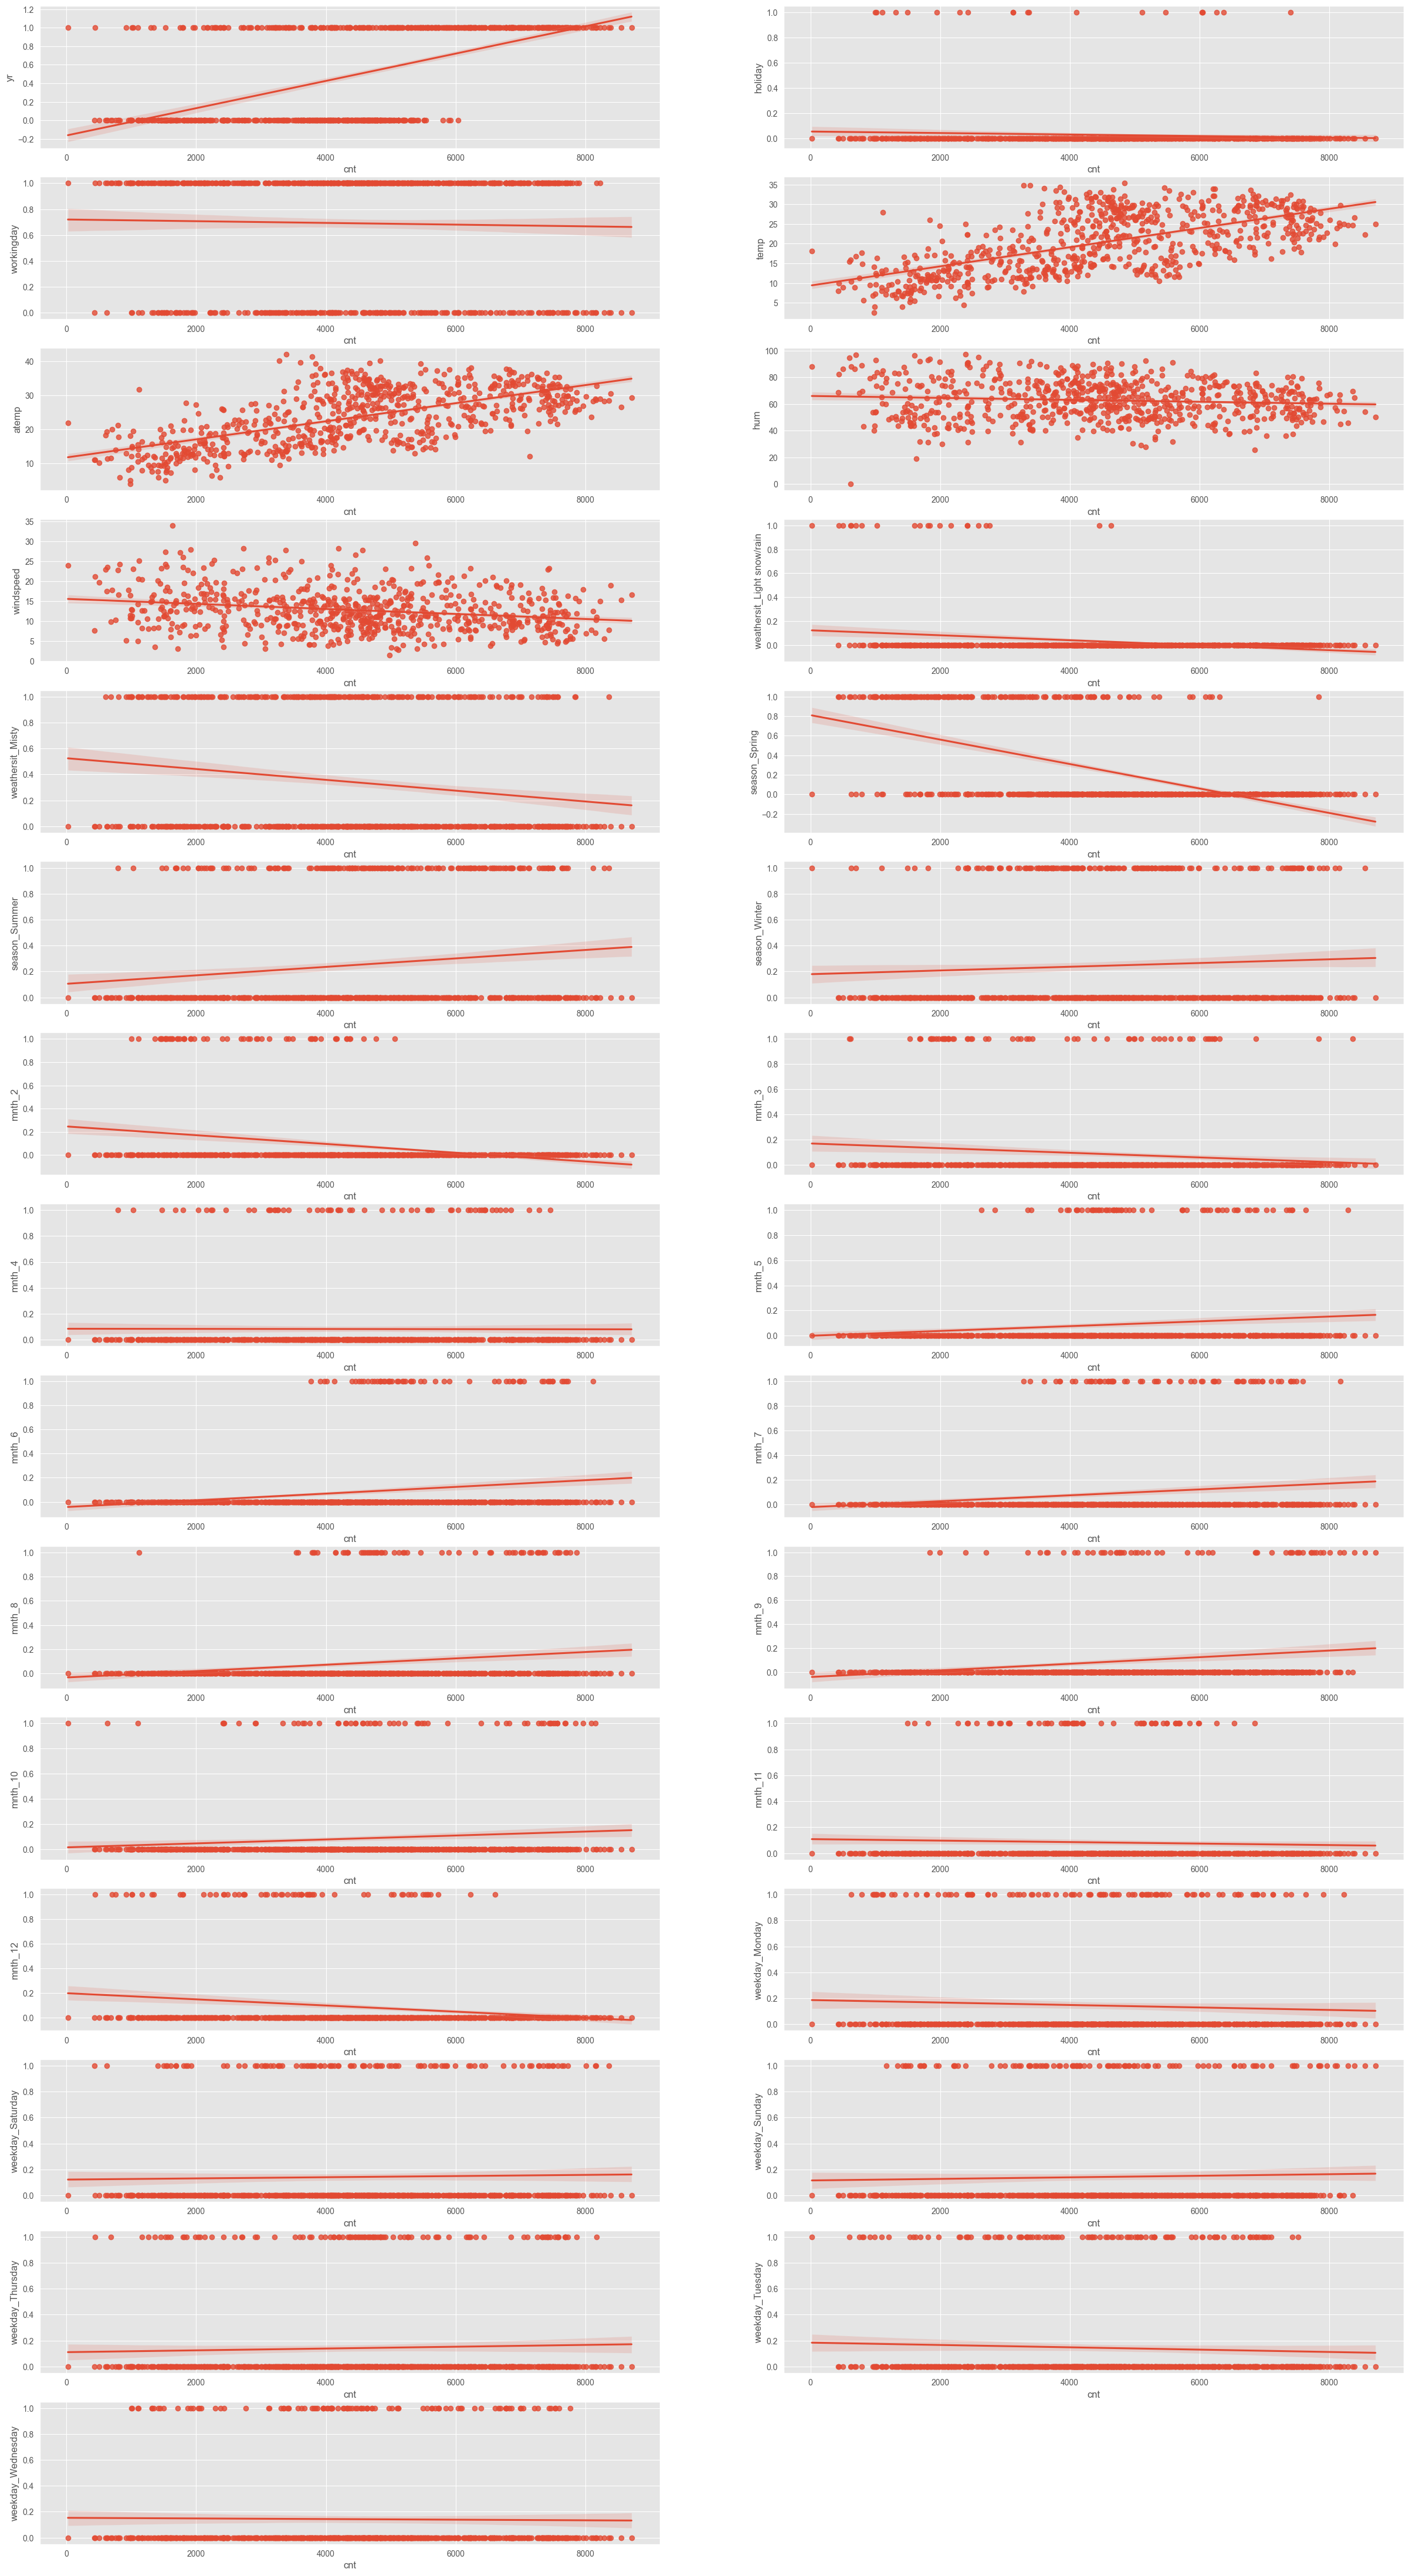

In [237]:
# Plotting Reg plot for all columns in the dataset w.r.t. their relationship with 'cnt'
l = 0
plt.figure(figsize=(30, 60))
for col in data.drop(columns=['cnt']):
    l += 1
    plt.subplot(16, 2, l)
    # sns.regplot(data, x='cnt', y=col, logistic=col in binary_columns)
    sns.regplot(data, x='cnt', y=col)
plt.show()

### Checking collinearity

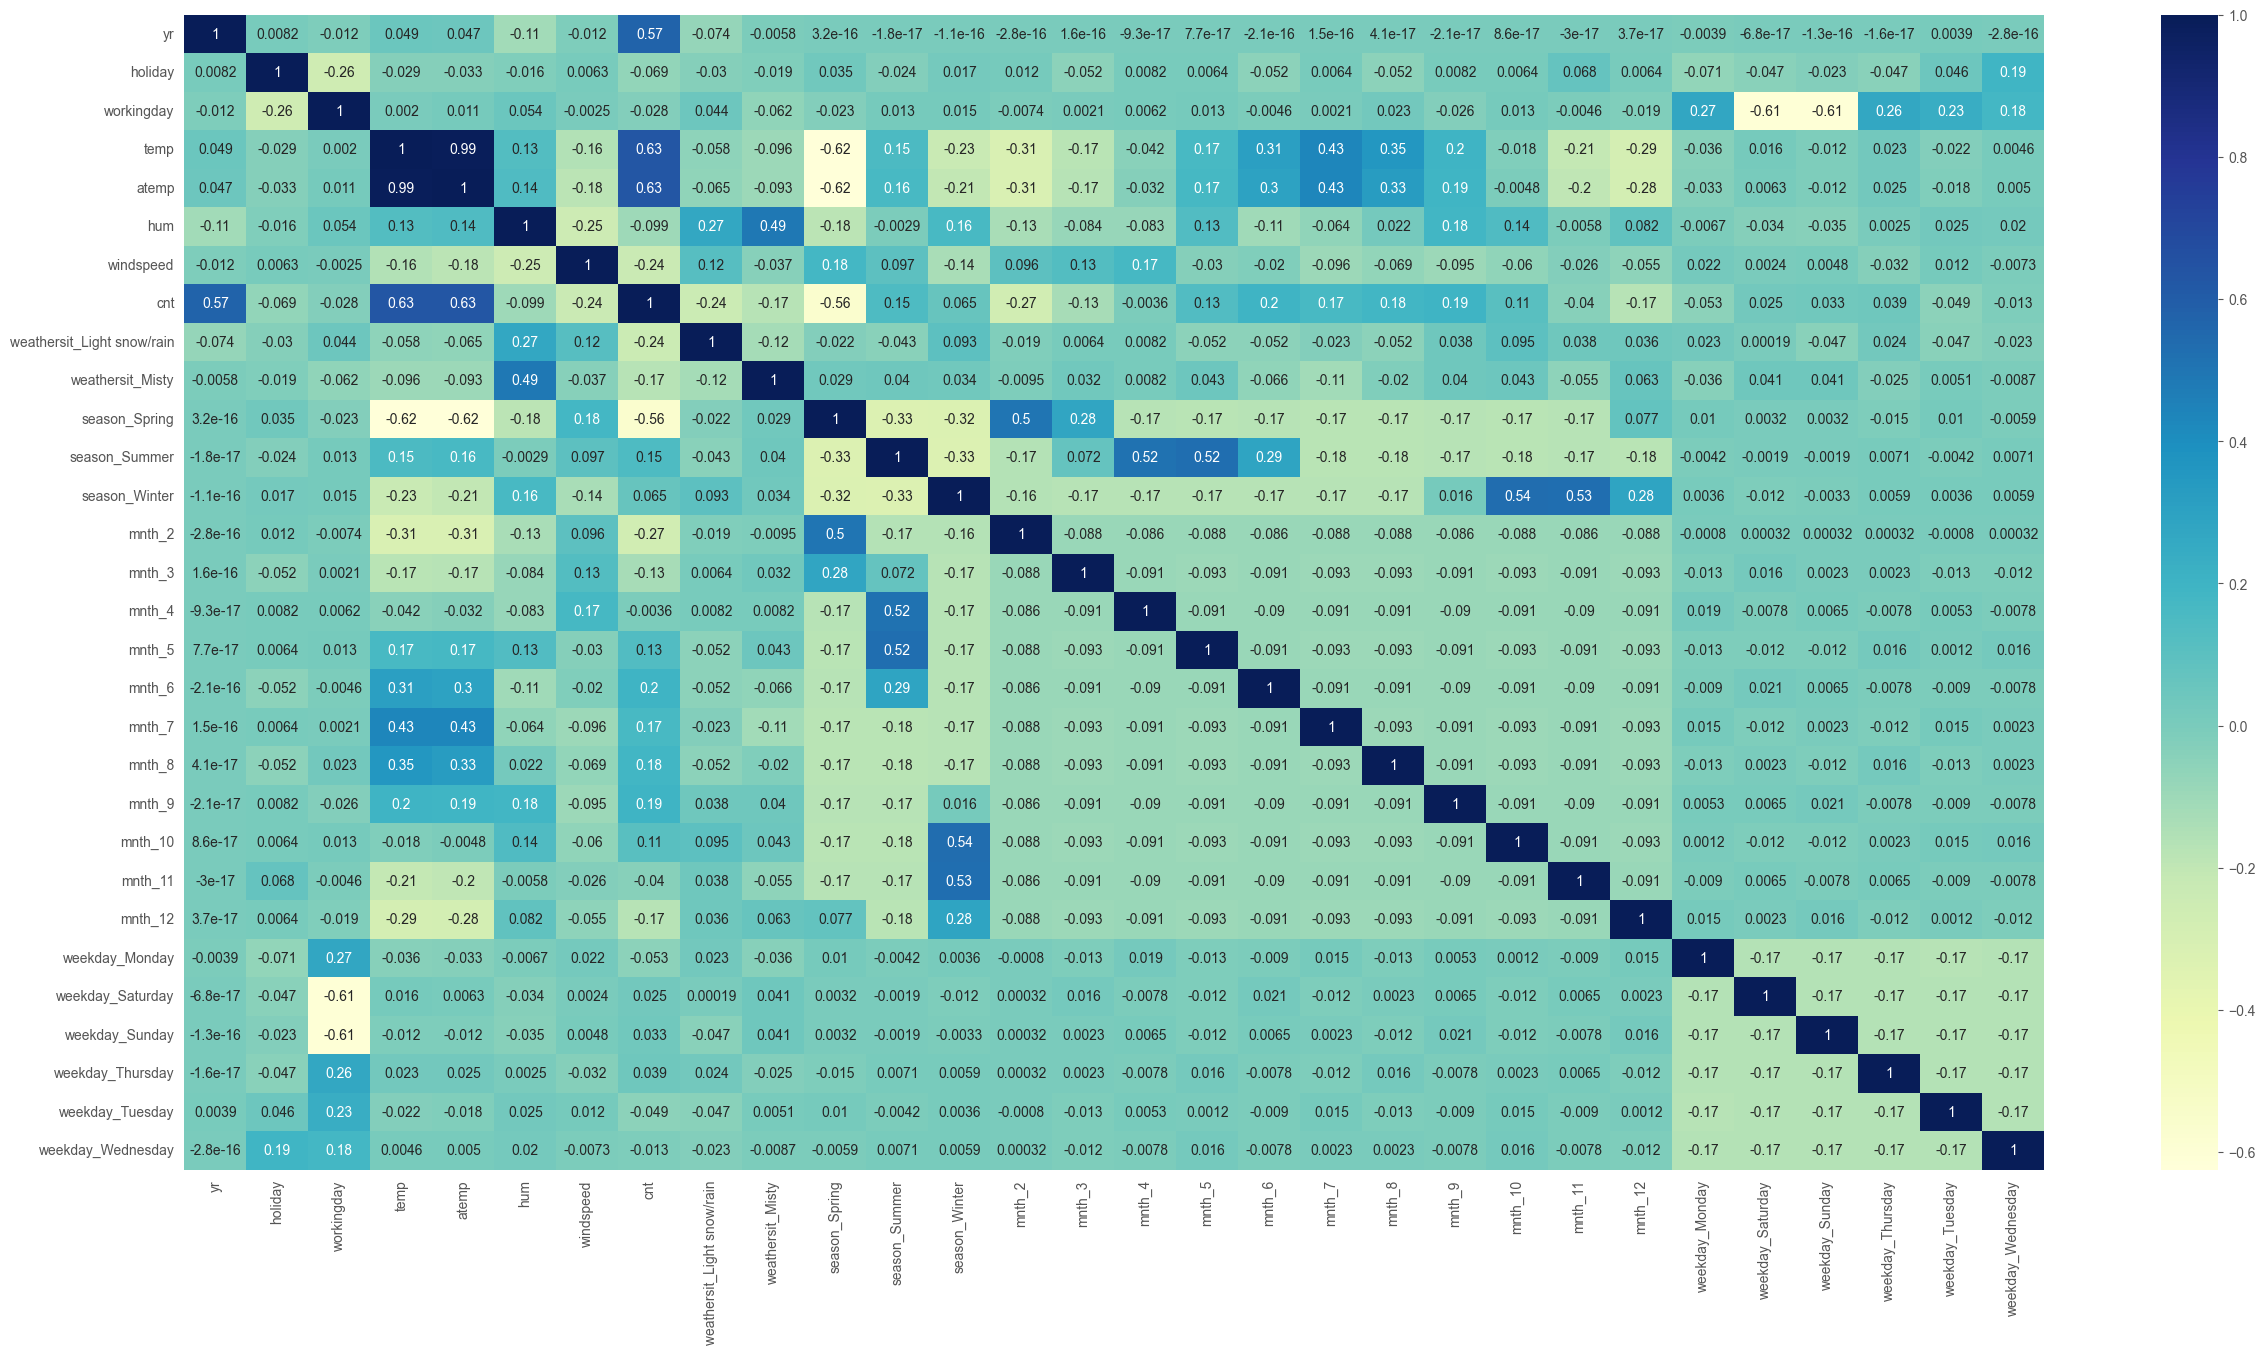

In [238]:
# Plotting Heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Split data into Train and Test

In [239]:
# Initalising seeding to save state
np.random.seed(0)

# Splitting train data to 70% and test data to 30% of the total data
train, test = train_test_split(data, test_size=0.3, random_state=100)

In [240]:
# Checking shape of train dataset
train.shape

(511, 30)

In [241]:
# Checking shape of test dataset
test.shape

(219, 30)

### Scaling Train Data

In [242]:
# Initialising MinMax scaling
scaler = MinMaxScaler()

In [243]:
# Getting column list for later usage while testing model
columns = train.columns.tolist()

In [244]:
# Scaling the data
train[columns] = scaler.fit_transform(train[columns])

In [245]:
# Checking the scaled dataset
train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653  1.0      0.0         1.0  0.509887  0.501133  0.575354   0.300794   
576  1.0      0.0         1.0  0.815169  0.766351  0.725633   0.264686   
426  1.0      0.0         0.0  0.442393  0.438975  0.640189   0.255342   
728  1.0      0.0         1.0  0.245101  0.200348  0.498067   0.663106   
482  1.0      0.0         0.0  0.395666  0.391735  0.504508   0.188475   

          cnt  weathersit_Light snow/rain  weathersit_Misty  ...  mnth_9  \
653  0.864243                         0.0               0.0  ...     0.0   
576  0.827658                         0.0               0.0  ...     0.0   
426  0.465255                         0.0               1.0  ...     0.0   
728  0.204096                         0.0               0.0  ...     0.0   
482  0.482973                         0.0               1.0  ...     0.0   

     mnth_10  mnth_11  mnth_12  weekday_Monday  weekday_Saturday  \
653      1.0      0.0      0.0             0.0               0.0   
576      0.0      0.0      0.0             0.0               0.0   
426      0.0      0.0      0.0             0.0               0.0   
728      0.0      0.0      1.0             1.0               0.0   
482      0.0      0.0      0.0             0.0               0.0   

     weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  
653             0.0               0.0              0.0                1.0  
576             0.0               0.0              0.0                1.0  
426             1.0               0.0              0.0                0.0  
728             0.0               0.0              0.0                0.0  
482             1.0               0.0              0.0                0.0  

[5 rows x 30 columns]

### Separating Target and Predictor Variables

In [246]:
# Saving our target and predictor values to y_train and x_train
y_train = train.pop('cnt')
x_train = train

In [247]:
# Verifying the shape of predictor data
x_train.shape

(511, 29)

In [248]:
# Checking shape of Target variables
y_train.shape

(511,)

### Activities Performed / Inferences
___
1. Converted columns - season, weathersit, mnth and weekday to categorical
2. Created dummy variables for these categorical columns
3. Checked for Linear distribution between the variables
4. Checked for collinearity between all the variables
5. Variables temp and atemp are highly related to each other with a value of 0.99, and is a correlation value of 0.63 with the target variable. ```Useful insight for Recursive Feature Elimation```
6. season_Spring and year are co-related to cnt with values of -0.56 and 0.57 respectively. ```Useful insight for Recursive Feature Elimation```
7. Month_10 and Month_12 is correlated to Season_Winter
8. season_Spring is correlated to temp
9. Month_4 and Month_5 is correlated to Season_Summer

## Creating a Linear Regression Model

In [249]:
# Initialise Linear Regression
reg = LinearRegression()

In [250]:
# Fitting (performing ML) with the training data
reg.fit(x_train, y_train)

LinearRegression()

### Creating Function to repeatedly test model performances
 - Implementing Recursive Feature Elimination
  - Considerin Variance Inflation Factor

In [251]:
def implement_rfe(predictor_variable=x_train, target_variable=y_train, model=reg, features_to_select=len(x_train.columns), columns_to_drop=[]):
    """
    This function implements RFE for regression model to assist building multiple models just by calling the function.
    :param predictor_variable: Supply the Training dataset with Predictor variables
    :param target_variable: Supply the Test dataset with Predictor variables
    :param model: Supply the Regression Model
    :param features_to_select: Number of features to select in the training dataset for RFE
    :param columns_to_drop: List of columns to not consider in the training dataset for RFE to lower the Variance Inflation Factor
    :return: linear regression model, fitted regression model using RFE with constant variable, fitted regression model using RFE without constant variable
    """

    # Dropping columns
    predictor_variable = predictor_variable.drop(columns=columns_to_drop)

    # Implementing Recursive Feature Elimination
    rfe = RFE(model, n_features_to_select=features_to_select)

    # Fitting the RFE Model
    rfe = rfe.fit(predictor_variable, target_variable)

    # Printing the columns with RFE rankings
    print('#' * 100, '\n')
    print('RFE Details:')
    print(list(zip(predictor_variable.columns, rfe.support_, rfe.ranking_)))
    print('#' * 100, '\n\n')

    # Printing the columns considered by the RFE
    print('#' * 100, '\n')
    print('Columns considered in the model:')
    rfe_col = predictor_variable.columns[rfe.support_]
    print(rfe_col)
    print('#' * 100, '\n\n')

    # Printing the columns not considered by the RFE
    print('#' * 100, '\n')
    print('Columns not considered in the model:')
    print(predictor_variable.columns[~rfe.support_])
    print('#' * 100, '\n\n')

    # Building Model using statsmodel, for the detailed statistics
    print('Building Model using statsmodel, for the detailed statistics')

    # Creating X_test dataframe with RFE selected variables
    rfe_1 = predictor_variable[rfe_col]

    # Adding a constant variable
    rfe_1 = sm.add_constant(rfe_1)

    # Running the linear model
    lm = sm.OLS(target_variable, rfe_1).fit()

    #Let's see the summary of our linear model
    print('#' * 100, '\n')
    print(lm.summary())
    print('#' * 100, '\n\n')

    # Get VIF
    rfe_2 = rfe_1.drop(['const'], axis=1)

    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    vif['Features'] = rfe_2.columns
    vif['VIF'] = [variance_inflation_factor(rfe_2.values, i) for i in range(rfe_2.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)


    # Display the VIF parameters
    print('#' * 100, '\n\n')
    print('VIF')
    print(vif)
    print('#' * 100, '\n\n')

    return lm, rfe_1, rfe_2

### Model 1
___
Considering All Variables to begin with

In [252]:
model_1 = implement_rfe()

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('holiday', True, 1), ('workingday', True, 1), ('temp', True, 1), ('atemp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Summer', True, 1), ('season_Winter', True, 1), ('mnth_2', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', True, 1), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('mnth_11', True, 1), ('mnth_12', True, 1), ('weekday_Monday', True, 1), ('weekday_Saturday', True, 1), ('weekday_Sunday', True, 1), ('weekday_Thursday', True, 1), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', True, 1)]
#################################################################################################### 


##############################################################

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.85 and 0.841 respectively.
- However, the t-values of several variables are very high along high VIF.
- This was expected as we didn't perform any kind of Variable Reductions.

### Model 2
___
- Dropping variables - atemp, holiday
- Consider only 25 variables

In [253]:
train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'weathersit_Light snow/rain', 'weathersit_Misty', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [254]:
col_to_drop = ['atemp', 'holiday']

In [255]:
len(train.columns) - len(col_to_drop)

27

In [256]:
model_2 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=25)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('workingday', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Summer', True, 1), ('season_Winter', True, 1), ('mnth_2', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', True, 1), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('mnth_11', True, 1), ('mnth_12', True, 1), ('weekday_Monday', True, 1), ('weekday_Saturday', True, 1), ('weekday_Sunday', True, 1), ('weekday_Thursday', False, 3), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', False, 2)]
#################################################################################################### 


#################################################################################################### 


#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.849 and 0.841 respectively. (quite similar to Model 1)
- Variables: 'weekday_Thursday', 'weekday_Wednesday' were not considered in the model.

### Model 3
___
- Additionaly dropping mnth_11 and mnth_12 as they have high p-values and are also collinear to Season_Winter

In [257]:
train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'weathersit_Light snow/rain', 'weathersit_Misty', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [258]:
col_to_drop.extend(['mnth_11', 'mnth_12'])

In [259]:
len(train.columns) - len(col_to_drop)

25

In [260]:
model_3 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=25)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('workingday', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Summer', True, 1), ('season_Winter', True, 1), ('mnth_2', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', True, 1), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('weekday_Monday', True, 1), ('weekday_Saturday', True, 1), ('weekday_Sunday', True, 1), ('weekday_Thursday', True, 1), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', True, 1)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr',

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.849 and 0.841 respectively. (similar to Model 2)

### Model 4
___
- Consider 22 features for model building

In [261]:
model_4 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=22)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('workingday', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Summer', True, 1), ('season_Winter', True, 1), ('mnth_2', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', False, 2), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('weekday_Monday', True, 1), ('weekday_Saturday', True, 1), ('weekday_Sunday', True, 1), ('weekday_Thursday', False, 4), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', False, 3)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['y

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.849 and 0.842 respectively. (quite similar to Model 3)
- Apart from the ones excluded manually, variables 'mnth_7', 'weekday_Thursday', 'weekday_Wednesday' were eliminated using RFE.

### Model 5
___
- Dropping Season_Summer as it has a high p-value and is also mnth_4 and mnth_5 which comparatively has a lower p-values

In [262]:
col_to_drop.append('season_Summer')

In [263]:
len(train.columns) - len(col_to_drop)

24

In [264]:
model_5 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=24)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('workingday', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_2', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', True, 1), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('weekday_Monday', True, 1), ('weekday_Saturday', True, 1), ('weekday_Sunday', True, 1), ('weekday_Thursday', True, 1), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', True, 1)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'workingday', 'temp', 'hum'

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.848 and 0.841 respectively. (quite similar to Model 4)
- The columns that were eliminated previously were reintroduced. In the next model, we will lower the features to 23

### Model 6
___
- We will select only 21 features to exclude the 3 features that got reintroduced.

In [265]:
model_6 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=21)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('workingday', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_2', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', False, 4), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('weekday_Monday', True, 1), ('weekday_Saturday', True, 1), ('weekday_Sunday', True, 1), ('weekday_Thursday', False, 3), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', False, 2)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'workingday', 'temp', 'h

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.848 and 0.841 respectively. (similar to Model 5)
- Variable 'mnth_2' has the highest p-value.

### Model 7
___
- We will select only 20 features

In [266]:
model_7 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=20)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('workingday', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_2', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', False, 5), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('weekday_Monday', False, 2), ('weekday_Saturday', True, 1), ('weekday_Sunday', True, 1), ('weekday_Thursday', False, 4), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', False, 3)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'workingday', 'temp', '

##### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.847 and 0.841 respectively. (quite similar to Model 6)
- Variable 'mnth_2' still has the highest p-value.

### Model 8
___
- We will drop 'mnth_2'

In [267]:
col_to_drop.append('mnth_2')

In [268]:
model_8 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=20)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('workingday', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', False, 4), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('weekday_Monday', True, 1), ('weekday_Saturday', True, 1), ('weekday_Sunday', True, 1), ('weekday_Thursday', False, 3), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', False, 2)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'workingday', 'temp', 'hum', 'windspeed',
   

##### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.847 and 0.841 respectively. (similar to Model 7)
- Variable 'weekday_Monday' and 'weekday_Tuesday' has the highest p-value.
- However, both these variables have collinearity with workingday. workingday also have a high VIF value. So, we will test if dropping workingday impacts R-values.

### Model 9
___
- Dropping workingday
- Selecting only 18 features to avoid previously eliminated features to be added back.

In [269]:
col_to_drop.append('workingday')

In [270]:
model_9 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=18)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', False, 3), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('weekday_Monday', True, 1), ('weekday_Saturday', False, 5), ('weekday_Sunday', False, 2), ('weekday_Thursday', False, 4), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', True, 1)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'temp', 'hum', 'windspeed', 'weathersit_Light snow/rain',
       'wea

##### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.845 and 0.840 respectively. (quite close to Model 8)
- Variable 'weekday_Wednesday' and 'weekday_Monday' have the highest p-value.

### Model 10
___
- Selecting only 17 features

In [271]:
model_10 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=17)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', False, 4), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('weekday_Monday', True, 1), ('weekday_Saturday', False, 6), ('weekday_Sunday', False, 3), ('weekday_Thursday', False, 5), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', False, 2)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'temp', 'hum', 'windspeed', 'weathersit_Light snow/rain',
       'we

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.844 and 0.839 respectively. (lower, yet quite close to Model 9)
- Variable 'weekday_Monday' and 'weekday_Tuesday' have the highest p-value.
- We had observed during analysis that the Weekday variable had very close trend of between 13.59% to 14.83% of total booking. This variable can have some or no influence towards the predictor.
- It seems that they have no influence in predictions.

### Model 11
___
- Selecting only 15 features

In [272]:
model_11 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=15)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', False, 6), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('weekday_Monday', False, 3), ('weekday_Saturday', False, 8), ('weekday_Sunday', False, 5), ('weekday_Thursday', False, 7), ('weekday_Tuesday', False, 2), ('weekday_Wednesday', False, 4)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'temp', 'hum', 'windspeed', 'weathersit_Light snow/rain',
       '

#### Reamrks
- The model had R-Squared and Adjusted R-Squared value of 0.842 and 0.837 respectively. (lower, yet quite close to Model 10)
- None of the variables have a high p-value, implying that they are significant predictors.
- However, we notice that mnth_7 is not considered amongst the predictors. We have identified during our visual analysis that amongst the months where rentals are high, mnth_7 was present in it.
- Hence, we will increase the variable by 1 and check if the Adjusted r-squared value increases or not.

### Model 12
___
Increasing predictor by 1

In [273]:
# Preventing weekdays to be re-added
col_to_drop.extend(['weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
                    'weekday_Thursday', 'weekday_Wednesday', 'weekday_Tuesday'])

In [274]:
len(train.columns) - len(col_to_drop)

16

In [275]:
model_12 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=16)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', True, 1), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'temp', 'hum', 'windspeed', 'weathersit_Light snow/rain',
       'weathersit_Misty', 'season_Spring', 'season_Winter', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10'],
      dtype='object')
#########################

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.842 and 0.837 respectively. (same as Model 11)
- Therefore, we will lower the feature selector to 15 like Model 11
- In Model 11, we also notice high VIF of ~26 for hum. We will drop it.

### Model 13
___
- Only 14 features to be selected (15 from Model 11 and excluding 1 for 'hum')
- Dropping 'hum'

In [276]:
col_to_drop.append('hum')

In [277]:
model_13 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=14)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('temp', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', False, 2), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'temp', 'windspeed', 'weathersit_Light snow/rain',
       'weathersit_Misty', 'season_Spring', 'season_Winter', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10'],
      dtype='object')
###########################################################

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.836 and 0.831 respectively. Although, the R-squared value dropped, the Adjusted R-Squared value didn't drop significantly.
- Variable 'temp' has a high VIF of 6.64 which is greater than 5 (recommended).
- However, since we know that temp has a strong corealtion with our target variable, we will investigate which variable has the highest collinearity with temp.

### Model 14
___
- Checking if dropping features affect the adjusted r-squared

In [278]:
model_14 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=13)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('temp', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_7', False, 3), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', False, 2)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'temp', 'windspeed', 'weathersit_Light snow/rain',
       'weathersit_Misty', 'season_Spring', 'season_Winter', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9'],
      dtype='object')
#####################################################################

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.833 and 0.829 respectively.
- On not considering another significant predictor, both the values dropped marginally.
- We will now consider to drop individual variables to reduce the VIF value.

### Model 15
___
- Reiterating several times with variable reductions
- Starting with dropping 'atemp' and 'holiday' variables

In [279]:
col_to_drop

['atemp',
 'holiday',
 'mnth_11',
 'mnth_12',
 'season_Summer',
 'mnth_2',
 'workingday',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Wednesday',
 'weekday_Tuesday',
 'hum']

In [280]:
col_to_drop = ['atemp',
               'holiday',
               'mnth_4',
               'season_Summer',
               'mnth_2',
               'workingday',
               'weekday_Monday',
               'weekday_Saturday',
               'weekday_Sunday',
               'weekday_Thursday',
               'weekday_Wednesday',
               'weekday_Tuesday',
               'hum',
               'mnth_5',
               'mnth_8',
               'mnth_3',
               'mnth_10']

In [281]:
lm_15, rfe_15, model_15 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=11)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('temp', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_6', False, 2), ('mnth_7', True, 1), ('mnth_9', True, 1), ('mnth_11', True, 1), ('mnth_12', True, 1)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'temp', 'windspeed', 'weathersit_Light snow/rain',
       'weathersit_Misty', 'season_Spring', 'season_Winter', 'mnth_7',
       'mnth_9', 'mnth_11', 'mnth_12'],
      dtype='object')
#################################################################################################### 


##############################################

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.831 and 0.827 respectively.
- The highest VIF value 0.023 is for mnth_12. However, since its lower than 0.05 we will not drop it.

### Model 16
___
- Reiterating several times with variable reductions
- Starting with dropping 'atemp', 'holiday' and 'mnth_4' variables

In [282]:
col_to_drop = ['atemp', 'holiday', 'mnth_4', 'mnth_7', 'mnth_5', 'season_Spring', 'weekday_Monday', 'mnth_3', 'weekday_Thursday', 'weekday_Tuesday', 'workingday', 'weekday_Saturday', 'hum', 'weekday_Sunday', 'mnth_8']

In [283]:
lm_16, rfe_16, model_16 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=10)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('temp', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Summer', True, 1), ('season_Winter', True, 1), ('mnth_2', False, 2), ('mnth_6', False, 5), ('mnth_9', True, 1), ('mnth_10', False, 4), ('mnth_11', True, 1), ('mnth_12', True, 1), ('weekday_Wednesday', False, 3)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'temp', 'windspeed', 'weathersit_Light snow/rain',
       'weathersit_Misty', 'season_Summer', 'season_Winter', 'mnth_9',
       'mnth_11', 'mnth_12'],
      dtype='object')
#################################################################################################### 



#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.827 and 0.823 respectively, which is lower than Model 15.

### Model 17
___
- Reiterating several times with variable reductions
- Starting with dropping 'atemp' variable

In [284]:
col_to_drop = ['atemp',
               'weekday_Saturday',
               'weekday_Sunday',
               'season_Summer',
               'season_Spring',
               'mnth_7',
               'mnth_2',
               'weekday_Tuesday',
               'weekday_Monday',
               'mnth_11',
               'mnth_12',
               'weekday_Wednesday',
               'weekday_Thursday', 'hum', 'workingday', 'holiday']

In [285]:
lm_17, rfe_17, model_17 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=11)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('temp', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Winter', True, 1), ('mnth_3', True, 1), ('mnth_4', True, 1), ('mnth_5', True, 1), ('mnth_6', True, 1), ('mnth_8', False, 2), ('mnth_9', True, 1), ('mnth_10', False, 3)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'temp', 'windspeed', 'weathersit_Light snow/rain',
       'weathersit_Misty', 'season_Winter', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_9'],
      dtype='object')
#################################################################################################### 


#########################################

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.823 and 0.820 respectively, which is lower than even Model 16.

### Model 18
___

In [286]:
col_to_drop = ['atemp', 'holiday', 'hum', 'workingday', 'weekday_Sunday', 'weekday_Saturday', 'mnth_3', 'season_Summer', 'mnth_12', 'mnth_11', 'mnth_10', 'mnth_5', 'mnth_4', 'mnth_8']

In [287]:
lm_18, rfe_18, model_18 = implement_rfe(columns_to_drop=col_to_drop, features_to_select=10)

#################################################################################################### 

RFE Details:
[('yr', True, 1), ('temp', True, 1), ('windspeed', True, 1), ('weathersit_Light snow/rain', True, 1), ('weathersit_Misty', True, 1), ('season_Spring', True, 1), ('season_Winter', True, 1), ('mnth_2', False, 5), ('mnth_6', False, 6), ('mnth_7', True, 1), ('mnth_9', True, 1), ('weekday_Monday', False, 2), ('weekday_Thursday', False, 4), ('weekday_Tuesday', True, 1), ('weekday_Wednesday', False, 3)]
#################################################################################################### 


#################################################################################################### 

Columns considered in the model:
Index(['yr', 'temp', 'windspeed', 'weathersit_Light snow/rain',
       'weathersit_Misty', 'season_Spring', 'season_Winter', 'mnth_7',
       'mnth_9', 'weekday_Tuesday'],
      dtype='object')
##################################################

#### Remarks
- The model had R-Squared and Adjusted R-Squared value of 0.829 and 0.826 respectively.

## Model Selection
___
**We will proceed with Model 15 as it has decent R-values and lower VIF.**

## Residual Analysis of the Train data

In [288]:
# Select the RFE model
# final_model = rfe_15
x_train_rfe = rfe_15

In [289]:
# New Model
x_train_new = model_15

In [290]:
# Predict rentals based on the model
y_train_rentals = lm_15.predict(x_train_rfe)

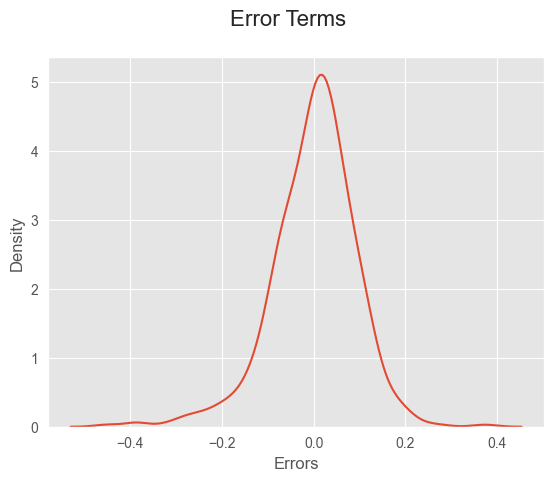

In [291]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.kdeplot(y_train - y_train_rentals)
fig.suptitle('Error Terms', fontsize = 16)                                              # Plot heading 
plt.xlabel('Errors')                                                                    # X-label
plt.show()

### Remarks
Errors are normally distribured here with mean 0. So everything seems to be fine

## Making Predictions for the Test dataset

In [292]:
# Perform Scaling on the dataset
test[columns] = scaler.transform(test[columns])

### Dividing into x_test and y_test

In [293]:
# Splitting predictor and target variables for Test data
y_test = test.pop('cnt')
x_test = test

In [294]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [295]:
# Making predictions
y_pred = lm_15.predict(x_test_new)

## Model Evaluation

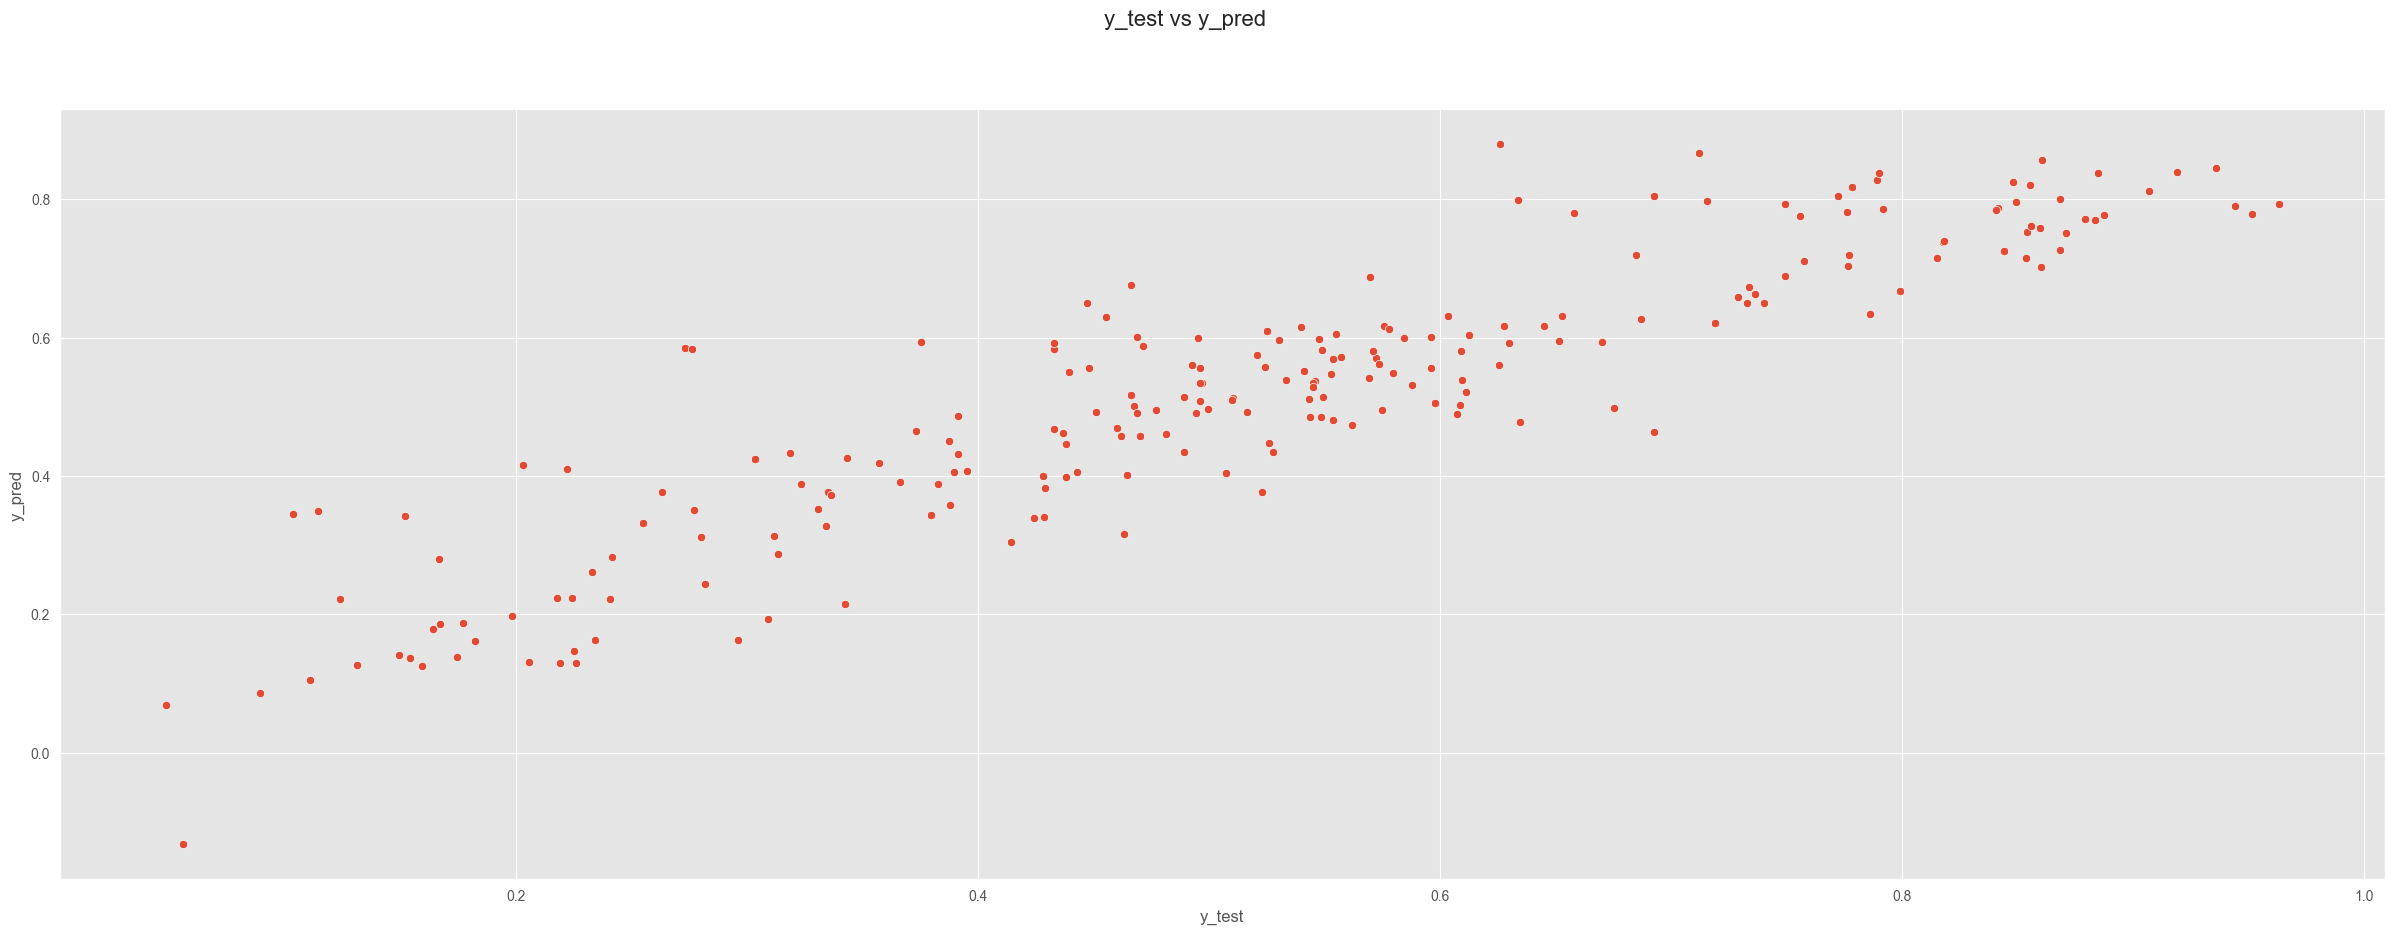

In [296]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(30, 10))
sns.scatterplot(x=y_test, y=y_pred)
plt.suptitle('y_test vs y_pred', fontsize=16)                                            # Plot heading 
plt.xlabel('y_test')                                                                     # X-label
plt.ylabel('y_pred')                                                                     # Y-label
plt.show()

___
___
### Finding R-squared and Adjusted R-Squared for Test set
___
___

In [297]:
#Evaluate R-square for test
r2 = r2_score(y_test, y_pred)
r2

0.8181140869836911

In [298]:
# n is number of rows in X

n = x_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = x_test.shape[1]

# We find the Adjusted R-squared using the formula
#adj r2=1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7902056664679612

### Plot Actual vs Predicted for Test values

In [299]:
#Function to plot Actual vs Predicted
#Takes Actual and Predicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act, pred, scale, dataname):
    c = [i for i in range(1,scale,1)]
    plt.figure(figsize=(30, 10))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    plt.suptitle('Actual and Predicted - '+dataname, fontsize=16)              # Plot heading
    plt.xlabel('Index')                               # X-label
    plt.ylabel('Counts')
    plt.show()

#### Visualising the fit on the test set

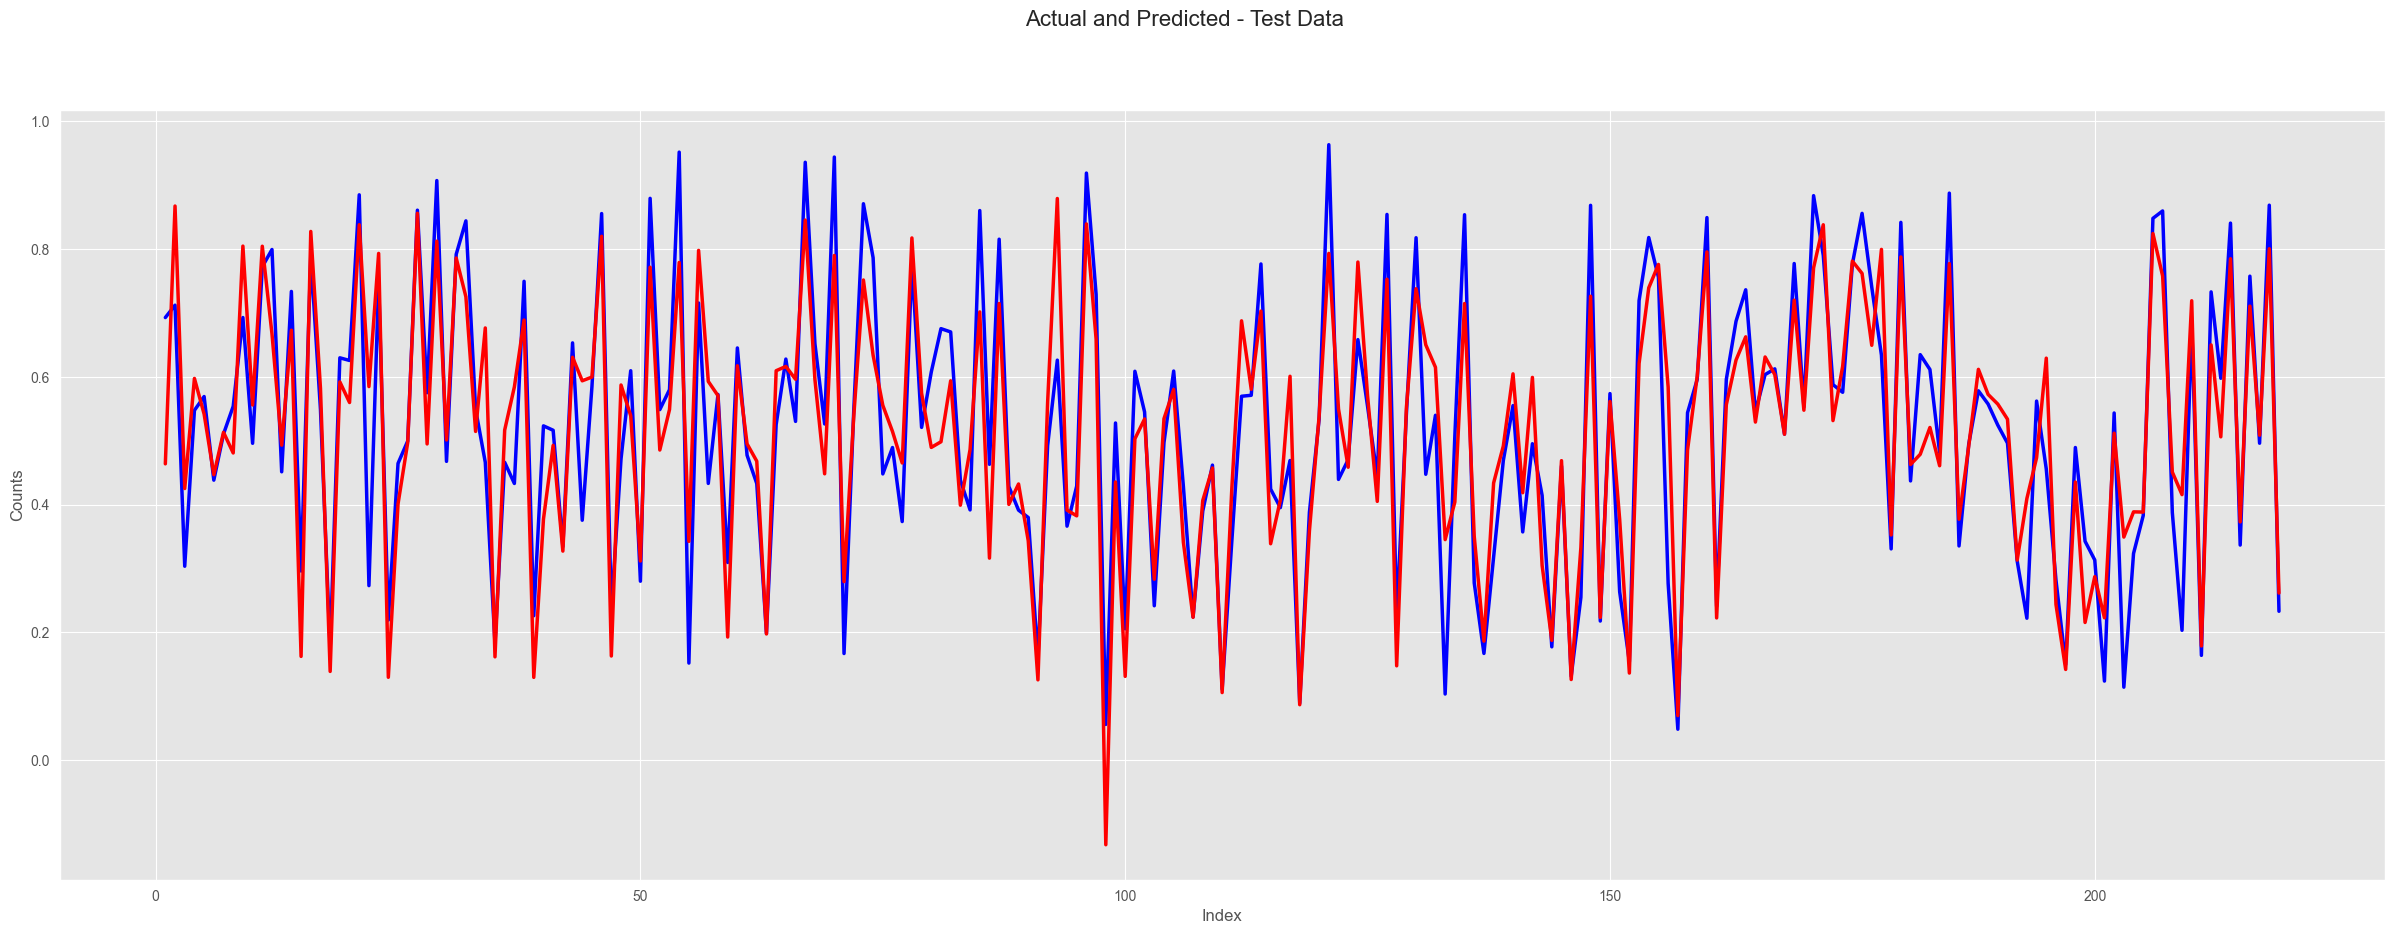

In [300]:
plot_act_pred(y_test, y_pred, len(y_test)+1,'Test Data')

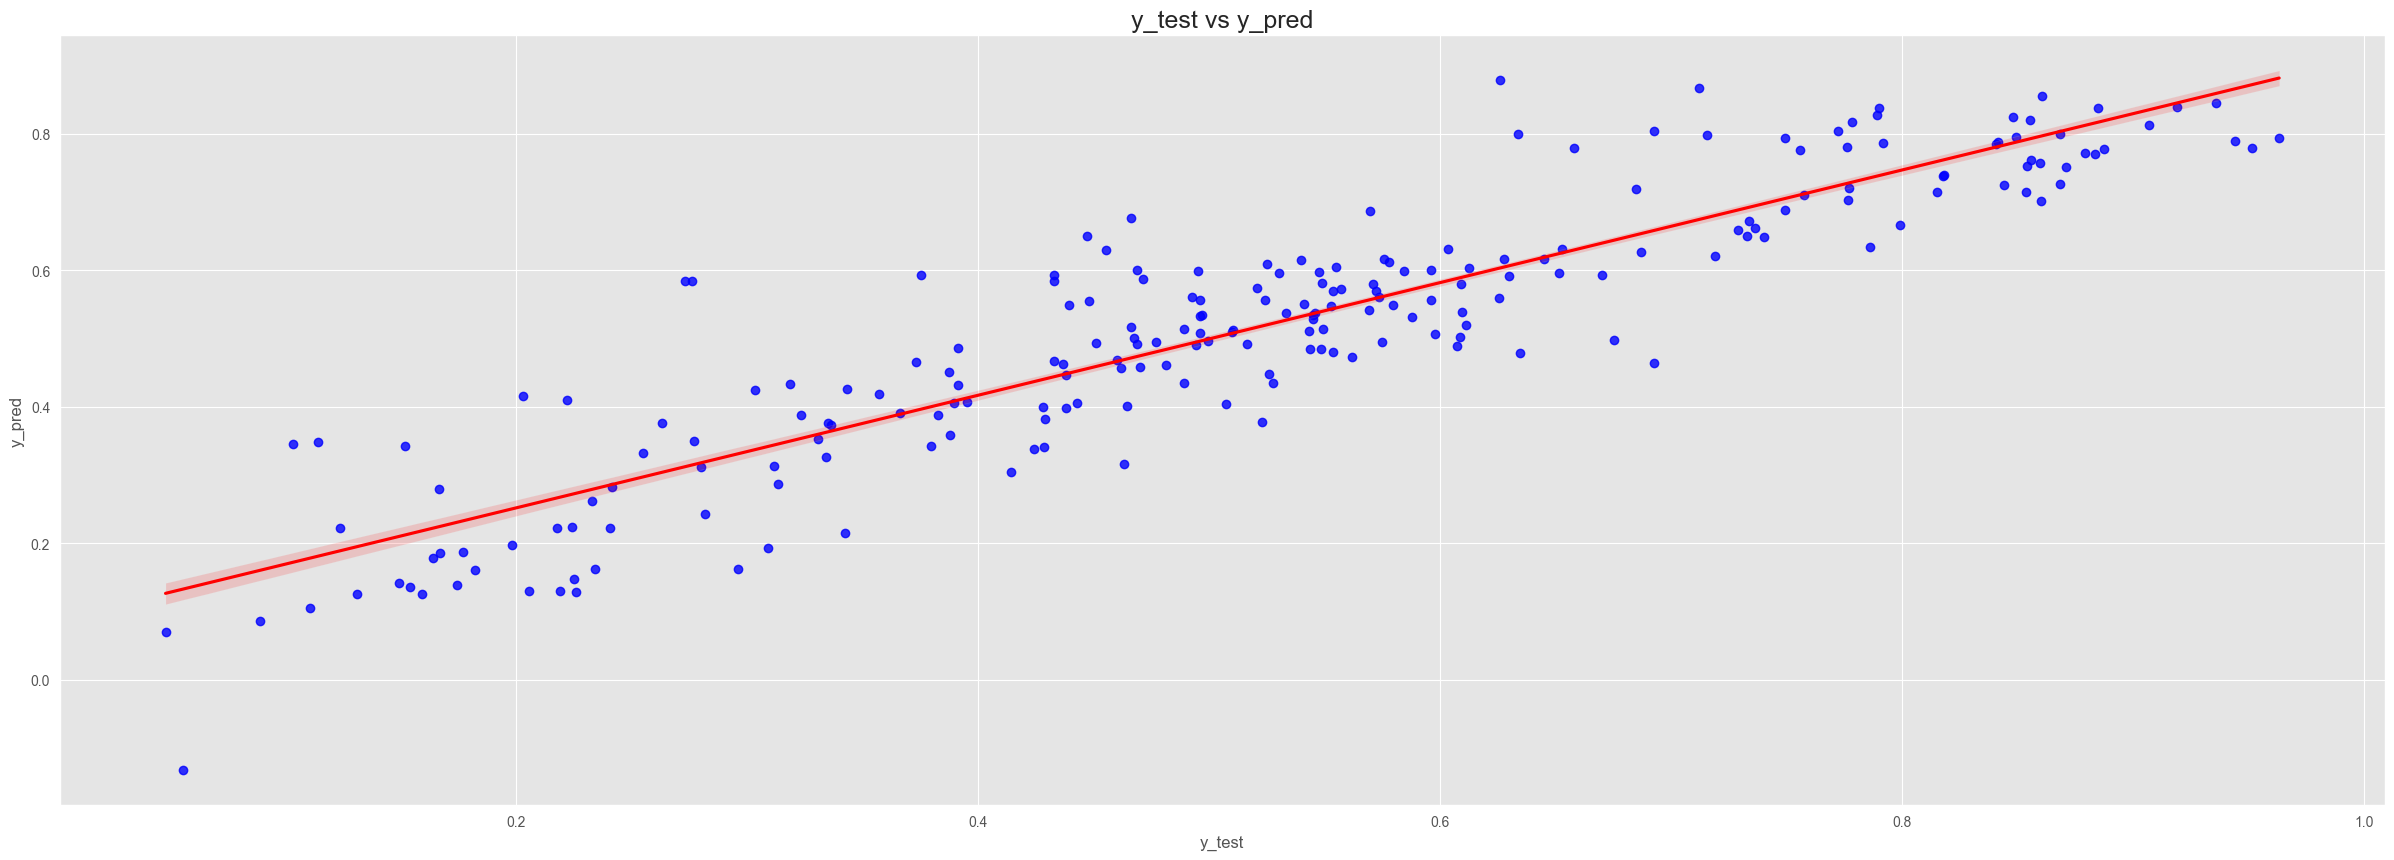

In [301]:
#Regression plot
plt.figure(figsize=(30,10))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=18)              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')                          # Y-label
plt.show()

In [302]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(30,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=18)              # Plot heading 
    plt.xlabel('Index')                      # X-label
    plt.ylabel('Counts - Predicted Counts')

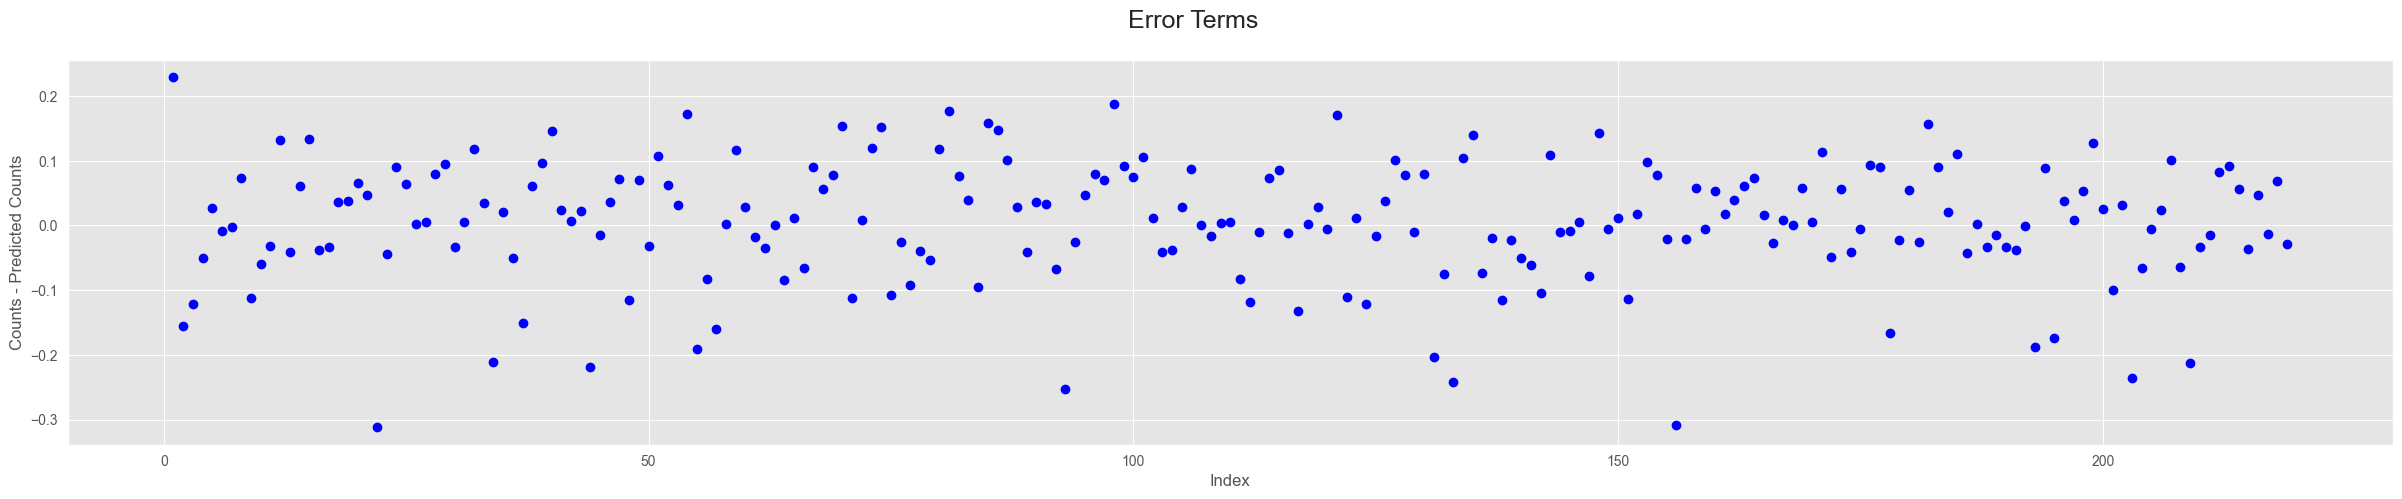

In [303]:
#Plot error terms for test data
plot_err_terms(y_test,y_pred)

#### Remarks
- Actual and Predicted result following almost the same pattern.
- Error terms are independent of each other. Error terms are randomly distributed and there is no pattern which means the output is explained well by the model.
- Variance of the residuals (error terms) is constant across predictions. i.e. error term does not vary much as the value of the predictor variable changes.
- Predictions for test data is very close to actuals.

## Final Result
___
**R Squared and Adjusted R Squared Values**

### 1. Train Data

$$R^2 = 0.831$$
$$\bar{R}^2 = 0.827$$


### 2. Test Data

$$R^2 = 0.818$$
$$\bar{R}^2 = 0.790$$

## Final Model Equation
___

### Equation

$$cnt = 0.2678 + (yr \times 0.2349) + (temp \times 0.4287) - (windspeed \times 0.1425) - (weathersit_{Light snow/rain} \times 0.2884) - 
(weathersit_{Misty} \times 0.0798) - (season_{Spring} \times 0.1196) + (season_{Winter} \times 0.0652) - (mnth_{7} \times 0.0689) + (mnth_{9} \times 0.0486) - (mnth_{11} \times 0.0507) - (mnth_{12} \times 0.0396)$$

### Variables
| **Variable**                     | **Description**                                                                         | **co-efficient** |
|----------------------------------|-----------------------------------------------------------------------------------------|:----------------:|
| **_cnt_**                        | Total Rentals                                                                           |        -         |
| **_yr_**                         | Year                                                                                    |      0.2349      |
| **_temp_**                       | Temperature in Degree Celsius                                                           |      0.4287      |
| **_windspeed_**                  | Windspeed                                                                               |     -0.1425      |
| **_weathersit_Light snow/rain_** | Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |     -0.2884      |
| **_weathersit_Misty_**           | Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                            |     -0.0798      |
| **_season_Spring_**              | Spring season                                                                           |     -0.1196      |
| **_season_Winter_**              | Winter season                                                                           |      0.0652      |
| **_mnth_7_**                     | July                                                                                    |     -0.0689      |
| **_mnth_9_**                     | September                                                                               |      0.0486      |
| **_mnth_11_**                    | November                                                                                |     -0.0507      |
| **_mnth_12_**                    | December                                                                                |     -0.0396      |

### Interpretation

A constant value of `0.2678` indicates that even if all the other predictor values are 0, the Total rentals would increase by `0.2678` units.

As per our final model (Model 15), the top 3 predictor variables that influences the bike bookings are:

- **Temperature _(temp)_**: A coefficient value of `0.4287` indicated that a unit increase in temp variable increases the bike rental numbers by `0.4287` units.
- **Weather with Light Snow/Rain _(weathersit_Light snow/rain)_**: A coefficient value of `-0.2884` indicates that a unit increase in weathersit_Light snow/rain variable decreases the bike hire numbers by `0.2884` units.
- **Year _(yr)_**: A coefficient value of `0.2349` indicates that a unit increase in yr variable increases the bike hire numbers by `0.2349` units.

So, it's recommended to consider these variables to achieve maximum Booking when the situation comes back to normal.

The next best features that can also be considered are,

- **Wind Speed _(windspeed)_**: A coefficient value of `-0.1425` indicates that a unit increase in windspeed variable decreases the bike rental numbers by `-0.1425` units.
- **Spring Season _(season_Spring)_**: - A coefficient value of `-0.1196` indicated that, a unit increase in season_Spring variable decreases the bike hire numbers by `0.1196` units.
- **Mist + Cloudy weather _(weathersit_Misty)_**: - A coefficient value of `-0.0798` indicated that, a unit increase in weathersit_Misty variable decreases the bike hire numbers by `0.0798` units.
- **Winter _(season_Winter)_**: - A coefficient value of `0.0652` indicated that, a unit increase in season_Spring variable increases the bike hire numbers by `0.0652` units.
- **Months**: July, September, November and December

## Conclusion
___
### What this means for the business?
- Focus on bike availability during sunny, warm weather.
- Consider adjustments during light snow/rain periods (promotions, staffing, etc.).
- Track year-on-year growth and plan accordingly.